- Os dados usados para esse projeto foram coletados na plataforma Kaggle.
- O problema apresentado é fictício, criado com o intuito de aprender Ciência de Dados
- O projeto foi orientado pela Comunidade DS

# Business Problem

CadioCatch Diseases é uma empresa especializada em detecção de doenças cardíacas em estágios iniciais. O seu modelo de negócio é do tipo Serviço, ou seja, a empresa ofereço o diagnóstico precoce de uma doença cardiovascular por um certo preço.
Atualmente, o diagnóstico de uma doença cardiovascular é feita manualmente por uma equipe de especialistas. A precisão atual do diagnóstico varia entre 55 % e 65 %, devido a complexidade do diagnóstico e também da fadiga da equipe que se revezam em turnos para minimizar os riscos. O custo de cada diagnóstico, incluindo os aparelhos e a folha de pagamento dos analistas, gira em torno de R$ 1.000,00.

O preço do diagnóstico, pago pelo cliente, varia de acordo com a precisão conseguida pelo time de especialistas, o cliente paga R$ 500,00 a cada 5 % de acurácia acima de 50 %. Por exemplo, para uma precisão de 55 %, o diagnóstico custa R$ 500,00 para o cliente, para uma precisão de 60 %, o valor é de R$ 1000,00 e assim por diante. Se a precisão do diagnóstico for 50 % o cliente não paga por ele.

Observe que a variação da precisão dada pelo time de especialistas, faz com que a empresa tenha ora uma operação com lucro, receita maior que o custo, ora uma operação com prejuízo, receita menor que o custo. Essa instabilidade do diagnóstico faz com que a empresa tenha um Cashflow imprevisível.
O seu objetivo como o Cientista de Dados contratado pela Cardio Catch Diseases é criar uma ferramenta que aumente a precisão do diagnóstico e que essa precisão seja estável para todos os diagnósticos.
Portanto o seu trabalho como Data Scientist é criar um ferramenta de classificação de doentes, como umaprecisão estável. 

## Premissas 

#### Outliers

O filtro dos outliers foram feitos com base na literatura.


#### Dados
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men 
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [38]:
jupyter_settings()

# Exploratory Data Analysis

### Univariate Anaysis

#### Geral

In [51]:
#Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply( np.median)).T

# Dispersion -std, min, max, range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std )).T
d2 = pd.DataFrame( num_attributes.apply( np.min )).T
d3 = pd.DataFrame( num_attributes.apply( np.max )).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew()  )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.00,99999.00,99999.0,49972.419900,50001.500,28851.096242,-0.001278,-1.198374
1,age,30.00,65.00,35.0,53.303157,54.000,6.760122,-0.306468,-0.821042
2,height,55.00,250.00,195.0,164.359229,165.000,8.210068,-0.642187,7.943653
3,weight,10.00,200.00,190.0,74.205690,72.000,14.395654,1.012070,2.586825
4,ap_hi,-1.50,240.00,241.5,126.979076,120.000,17.169958,0.855635,2.101024
5,ap_lo,-0.70,208.80,209.5,81.659033,80.000,10.235389,0.850847,9.013562
6,cardio,0.00,1.00,1.0,0.499700,0.000,0.500000,0.001200,-2.000056
7,imc,3.47,298.67,295.2,27.556560,26.375,6.091364,7.728847,221.232148


Visualização da distribuição da variável resposta:

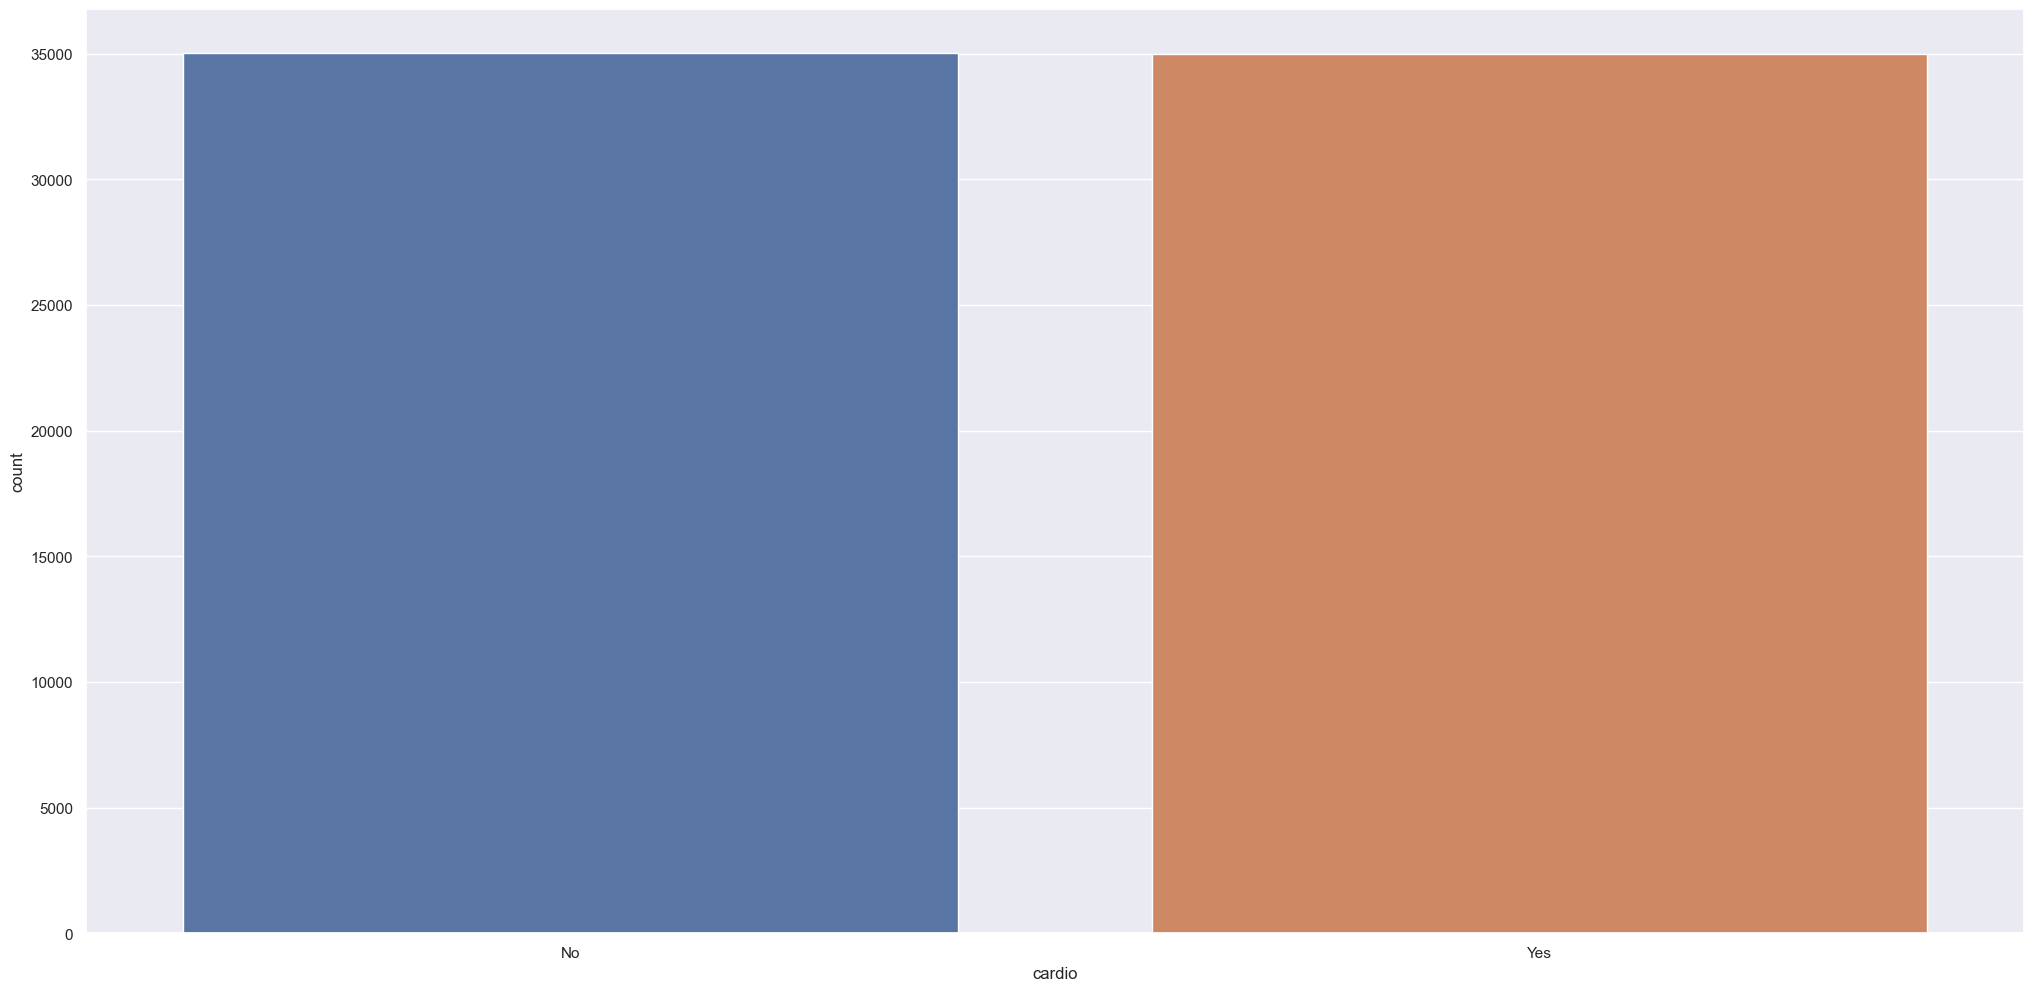

In [52]:
# counts each class for the target var
_ = sns.countplot(x=df2['cardio'])

# sets plot features
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

#### Graf num

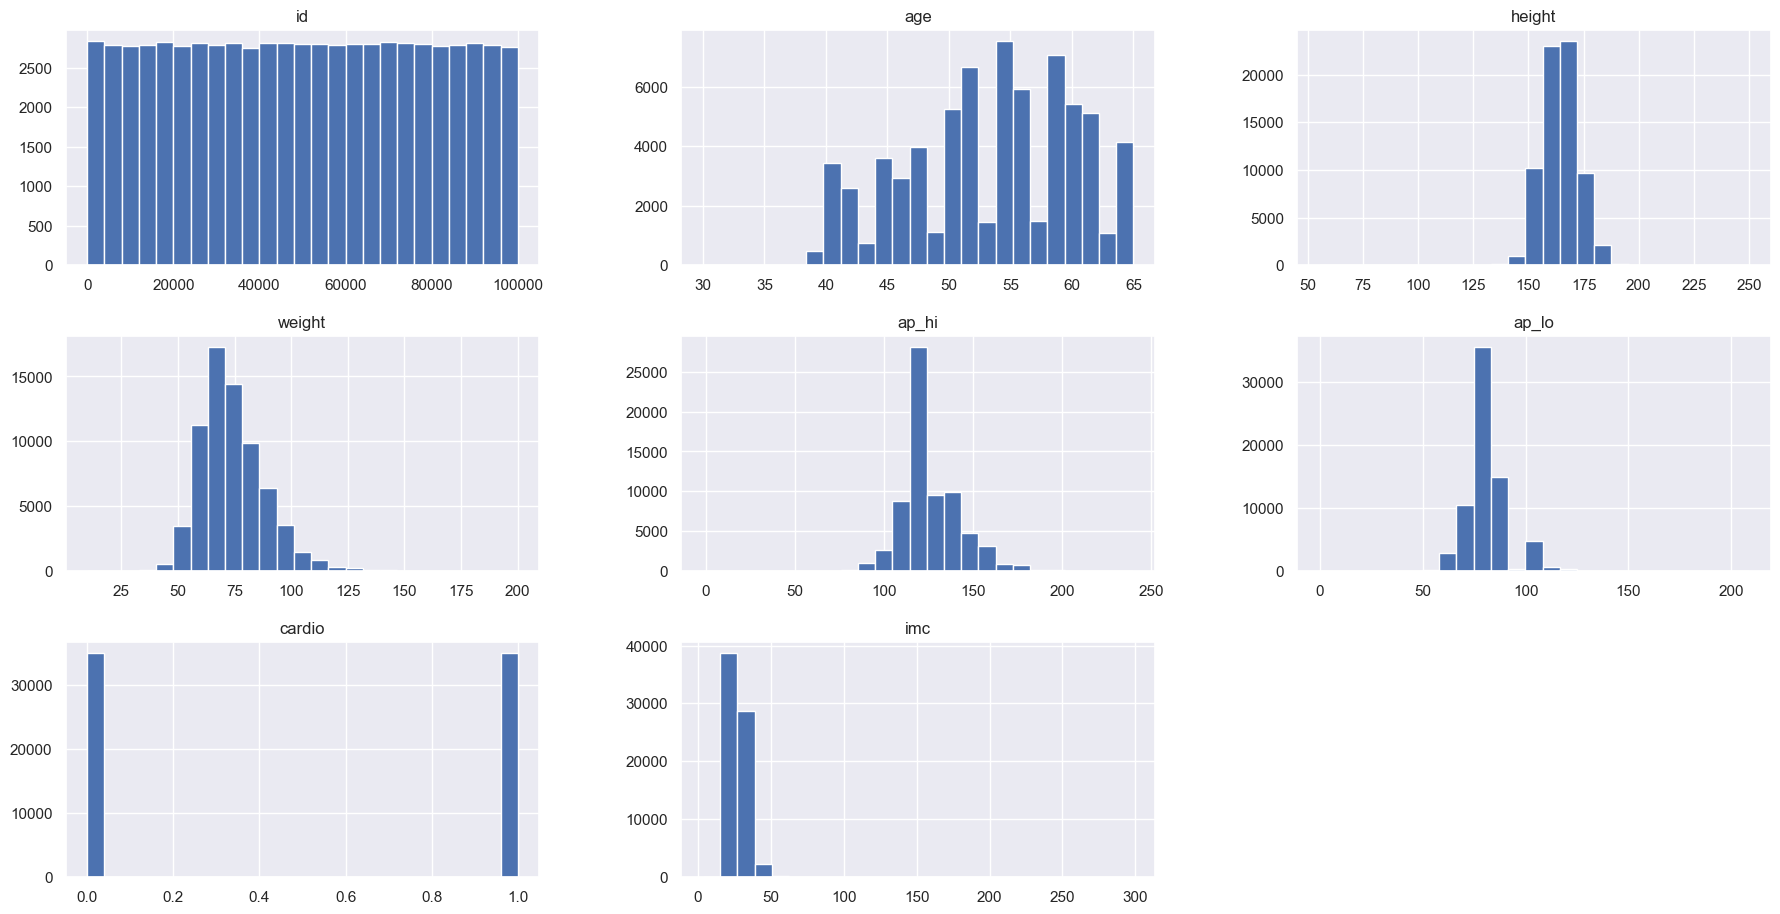

In [53]:
num_attributes.hist( bins=25, figsize=(22,11) );

Distribuição dos dados 'age'. 

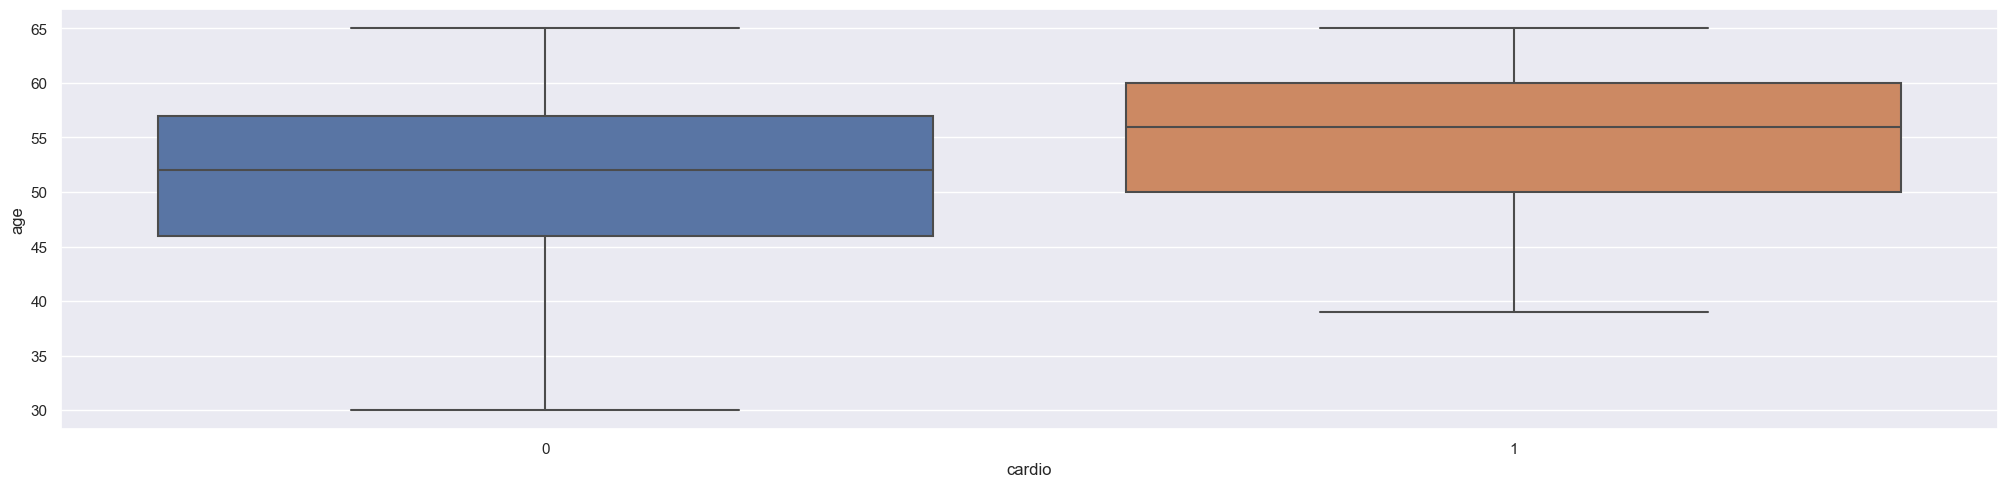

In [54]:
plt.subplot(2, 1, 1)
sns.boxplot(x='cardio', y='age',  data=df2);

Distribuição dos dados 'pressão alta(sistólica)', 'pressão baixa(diastólica)' e a junção entre as 2 pressões. 

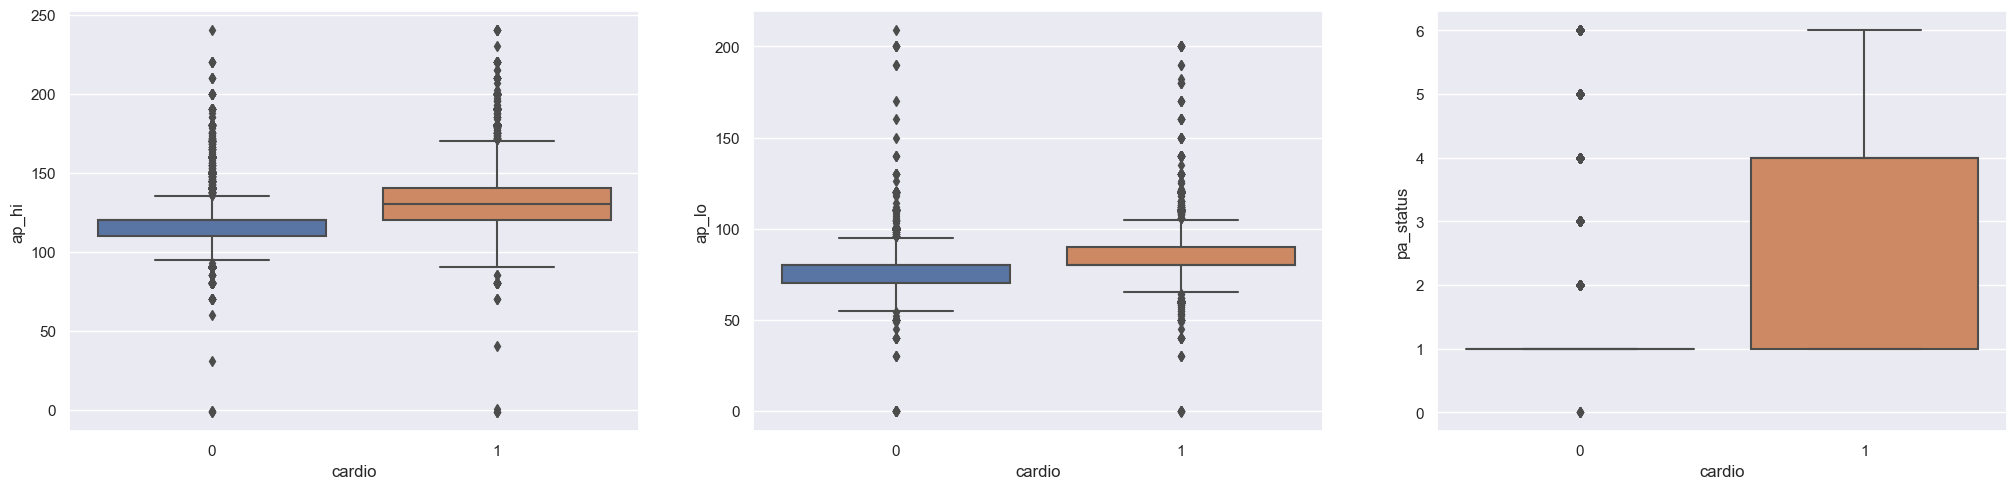

In [55]:
# PA

plt.subplot(2, 3, 1)
sns.boxplot(x='cardio', y='ap_hi',  data=df2);

plt.subplot(2, 3, 2)
sns.boxplot(x='cardio', y='ap_lo',  data=df2);

plt.subplot(2, 3, 3)
sns.boxplot(x='cardio', y='pa_status',  data=df2);




Distribuição dos dados 'altura', 'peso', e 'imc'. 

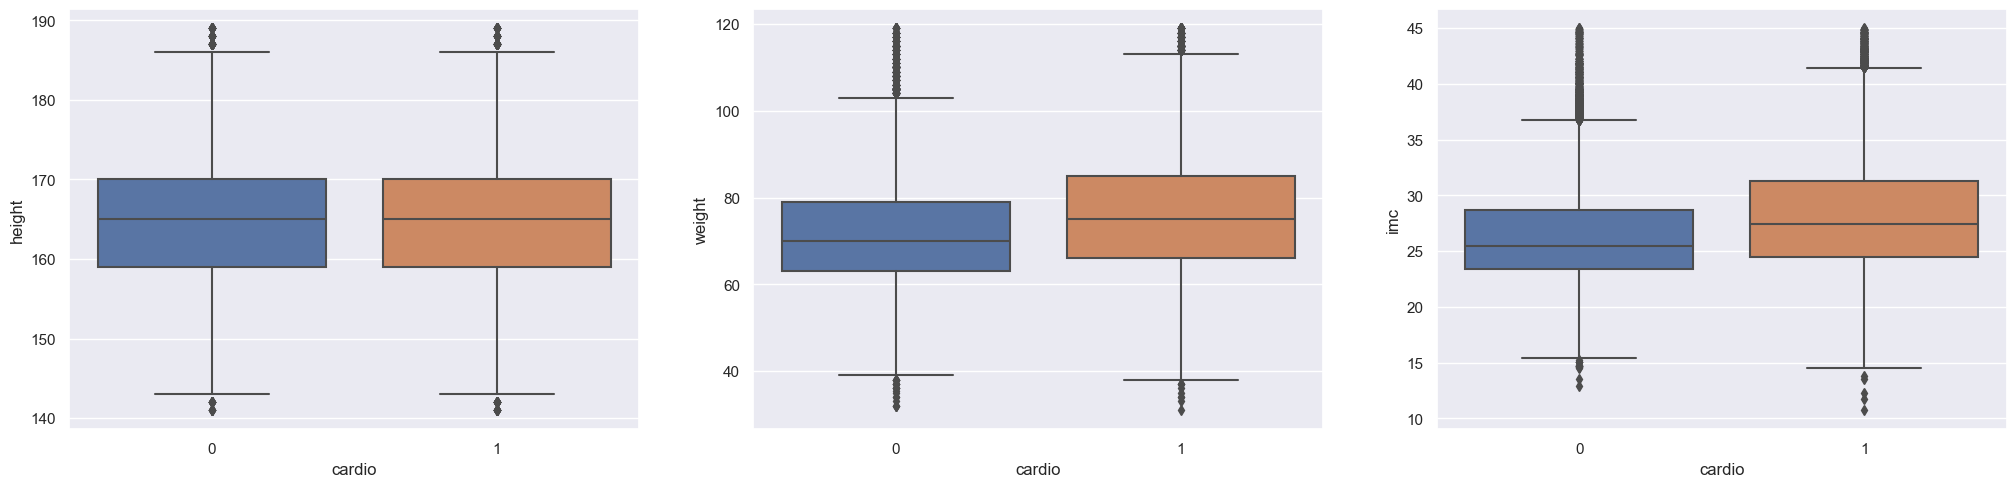

In [56]:
# cm - <130 > 200
plt.subplot(2, 3, 1)
aux1 = df_cat[( df_cat['height'] > 140 ) & (df_cat['height'] < 190) ]
sns.boxplot(x='cardio', y='height',  data=aux1);

# KG - <40 > 200
plt.subplot(2, 3, 2)
aux2 = df_cat[( df_cat['weight'] > 30 ) & (df_cat['weight'] < 120) ]
sns.boxplot(x='cardio', y='weight',  data=aux2);

plt.subplot(2, 3, 3)
aux = df_cat[( df_cat['imc'] > 10 ) & (df_cat['imc'] < 45) ]
sns.boxplot(x='cardio', y='imc',  data=aux);


#### Categorical Analysis

Gráfico 1 e 2: Distribuição e densidade de Colesterol

Gráfico 3 e 4: Distribuição e densidade de Glicemia

Gráfico 5 e 6: Distribuição e densidade de Gênero

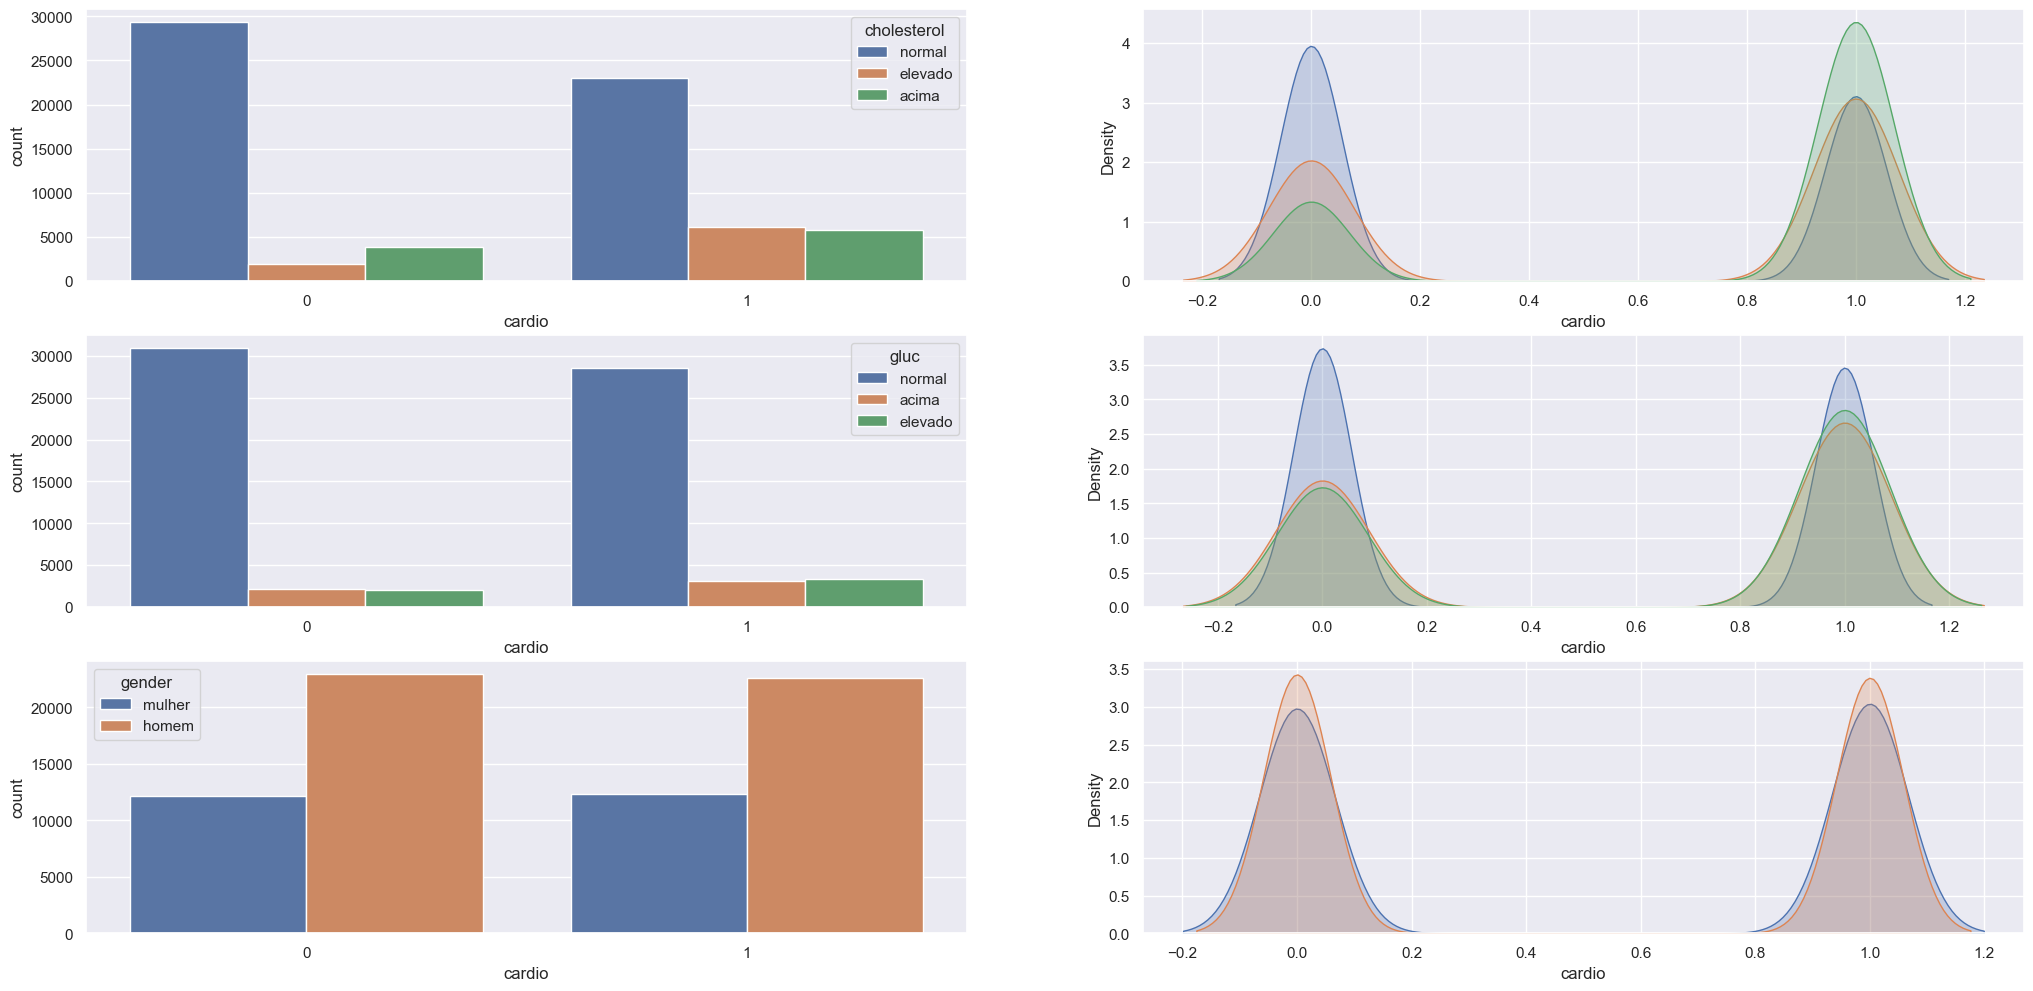

In [73]:
# soro_map = { 1: 'normal', 2: 'acima', 3: 'elevado'}

plt.subplot( 3, 2, 1)

sns.countplot(
    x='cardio',
    hue=('cholesterol'),
    data=df_cat,
);

plt.subplot( 3, 2, 2 )
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'normal']['cardio'],  fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'acima']['cardio'],  fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'elevado']['cardio'],  fill=True, legend=True );

plt.subplot( 3, 2, 3)
sns.countplot(
    x='cardio',
    hue=('gluc'),
    data=df_cat,
);

plt.subplot( 3, 2, 4 )
sns.kdeplot( df_cat[df_cat['gluc'] == 'normal']['cardio'],  fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['gluc'] == 'acima']['cardio'],  fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['gluc'] == 'elevado']['cardio'],  fill=True, legend=True );

plt.subplot( 3, 2, 5)
sns.countplot(
    x='cardio',
    hue=('gender'),
    data=df_cat,
);

plt.subplot( 3, 2, 6 )
sns.kdeplot( df_cat[df_cat['gender'] == 'mulher']['cardio'],  fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['gender'] == 'homem']['cardio'],  fill=True, legend=True );


Gráfico 1 e 2: Distribuição e densidade de Fumantes

Gráfico 3 e 4: Distribuição e densidade de Álcool

Gráfico 5 e 6:Distribuição e densidade de atividade física

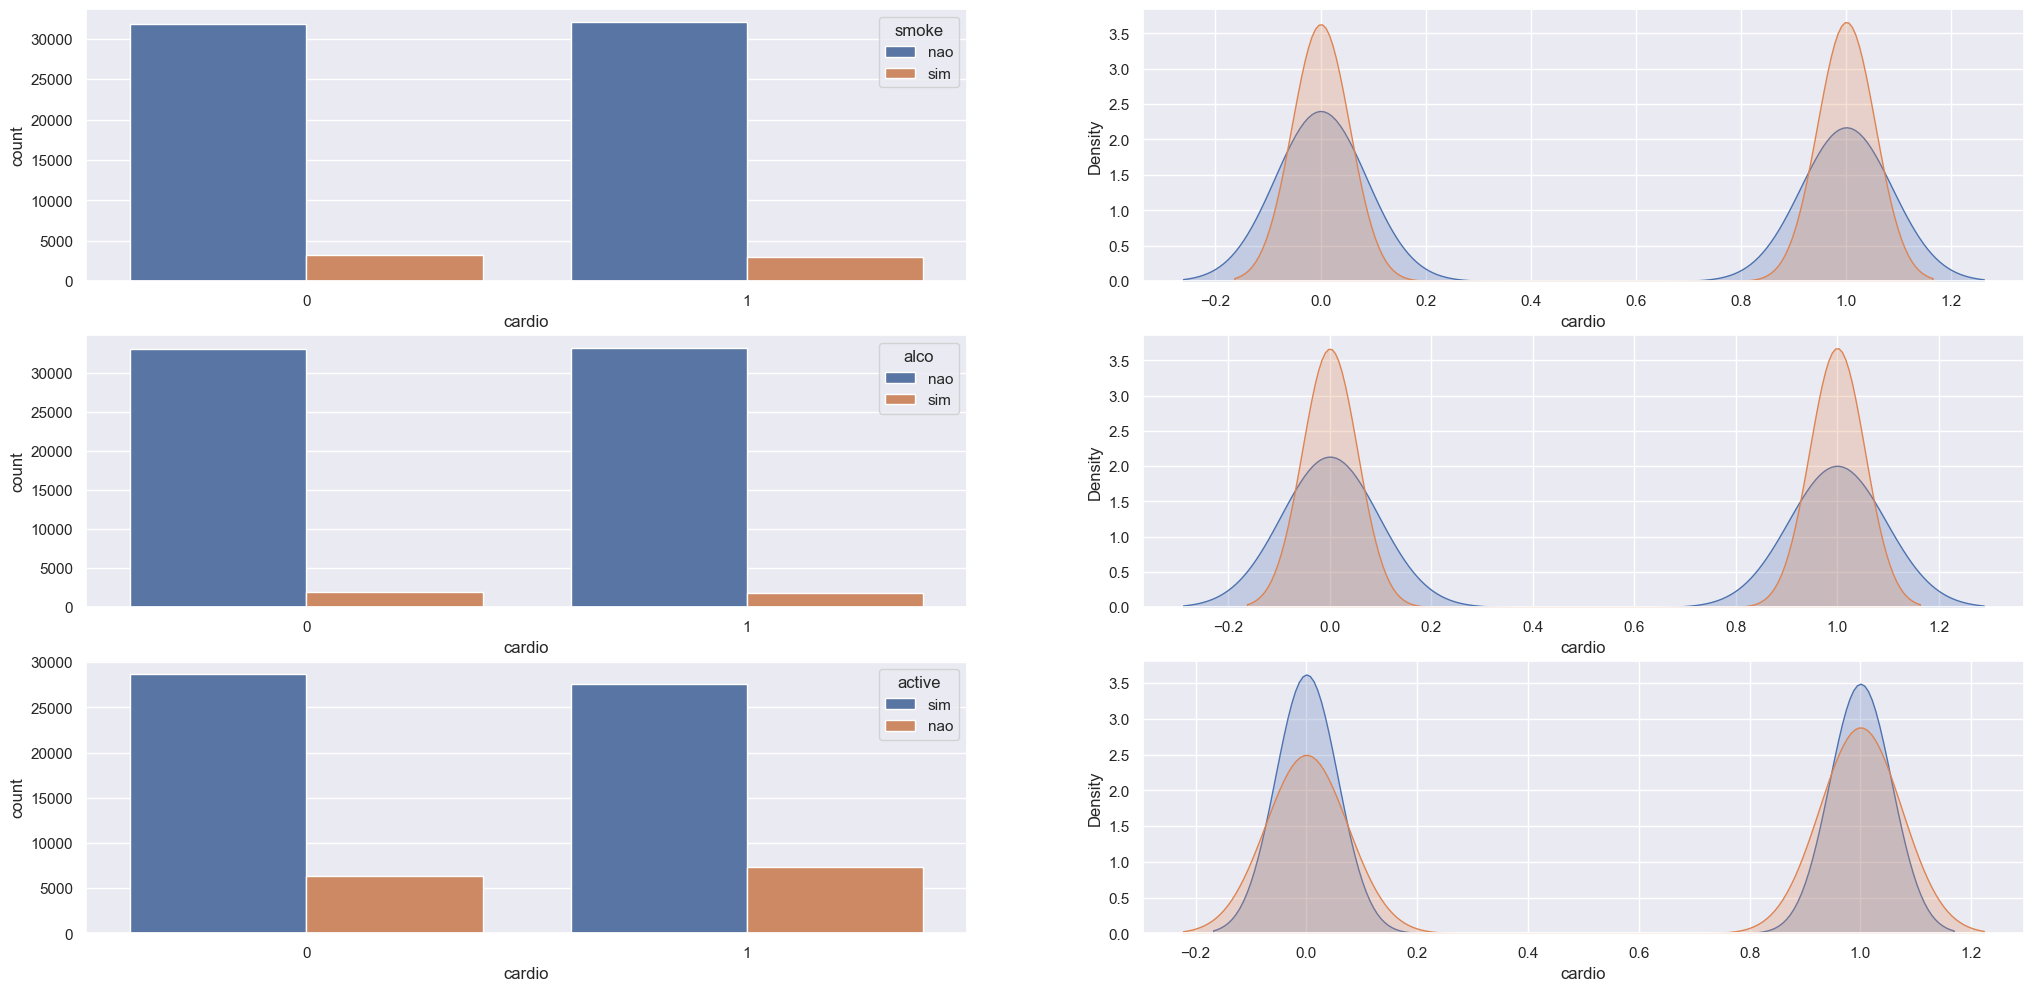

In [58]:
plt.subplot(3, 2, 1)
sns.countplot(
    x='cardio',
    hue=('smoke'),
    data=df_cat,
);

plt.subplot( 3, 2, 2 )
sns.kdeplot( df_cat[df_cat['smoke'] == 'sim']['cardio'], fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['smoke'] == 'nao']['cardio'], fill=True, legend=True );


plt.subplot(3, 2, 3)
sns.countplot(
    x='cardio',
    hue=('alco'),
    data=df_cat,
);

plt.subplot( 3, 2, 4 )
sns.kdeplot( df_cat[df_cat['alco'] == 'sim']['cardio'], fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['alco'] == 'nao']['cardio'], fill=True, legend=True );


plt.subplot(3, 2, 5)
sns.countplot(
    x='cardio',
    hue=('active'),
    data=df_cat,
);

plt.subplot( 3, 2, 6 )
sns.kdeplot( df_cat[df_cat['active'] == 'sim']['cardio'], fill=True, legend=True  ); 
sns.kdeplot( df_cat[df_cat['active'] == 'nao']['cardio'], fill=True, legend=True );


Gráfico 1 e 2: Distribuição e densidade de imc status

Gráfico 3 e 4: Distribuição e densidade de pa status

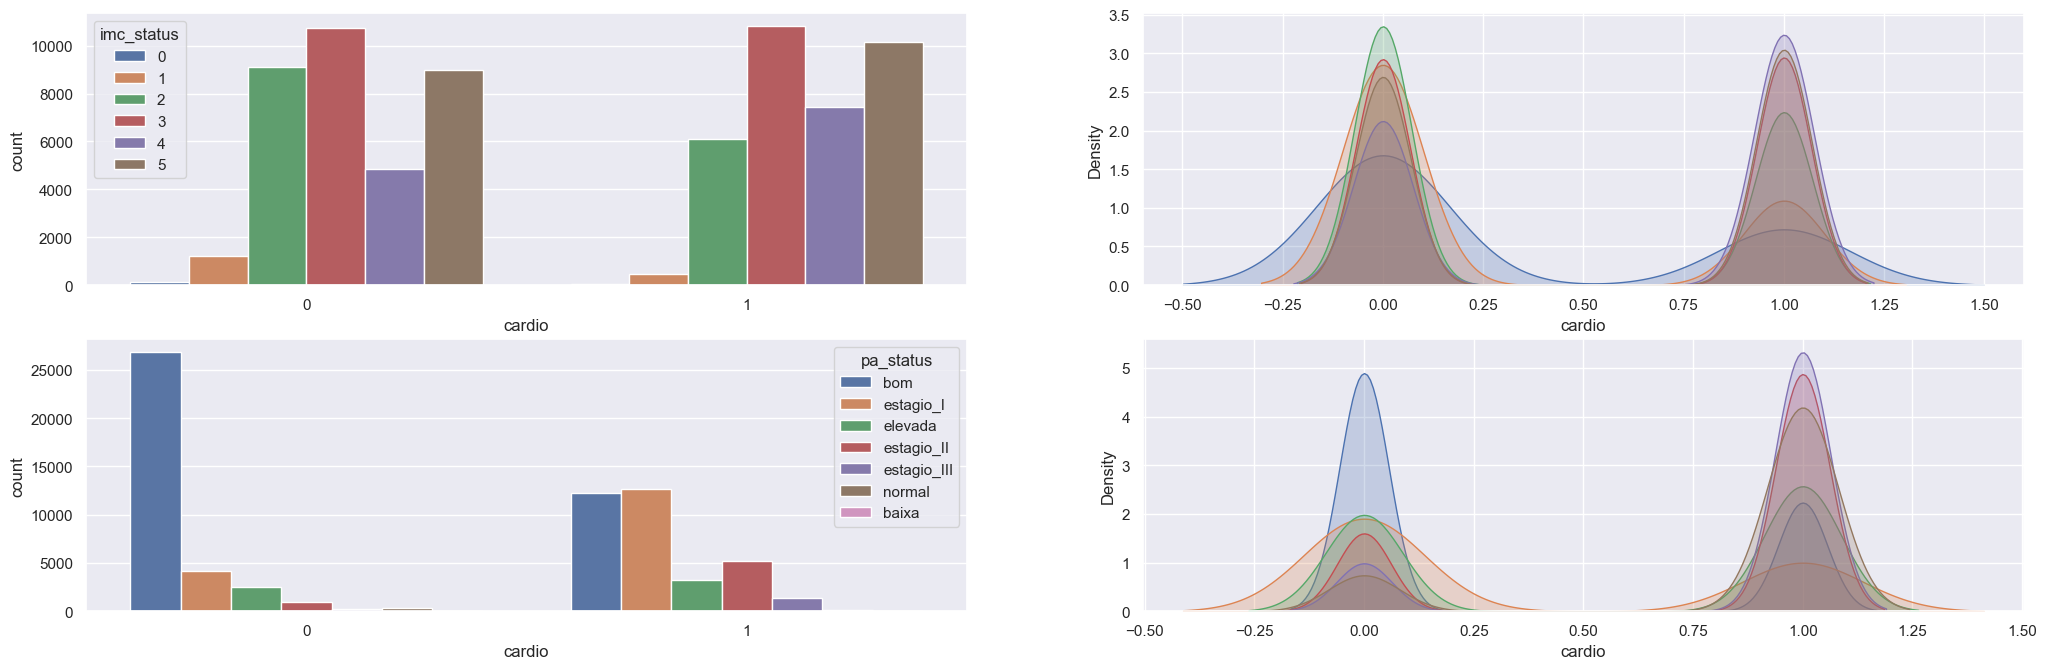

In [59]:
plt.subplot(3, 2, 1)
sns.countplot(
    x='cardio',
    hue=('imc_status'),
    data=df2,
);



plt.subplot( 3, 2, 2 )
sns.kdeplot( df_cat[df_cat['imc_status'] == 'magreza']['cardio'], fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'abaixo']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'normal']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'acima']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'obesidade']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'morbidade']['cardio'], fill=True, legend=True );


plt.subplot(3, 2, 3)
sns.countplot(
    x='cardio',
    hue=('pa_status'),
    data=df_cat,
);


plt.subplot( 3, 2, 4 )
# sns.kdeplot( df_cat[df_cat['pa_status'] == 'baixa']['cardio'], fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'bom']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'normal']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'elevada']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estagio_I']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estagio_II']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estagio_III']['cardio'], fill=True, legend=True );

### Bivariate Analysis

##### Visão geral das hipóteses: 
1. False  - pouco relevante
2. True   - muito Relevante
3. True   - muito relevante
4. False  - pouco relevante
5. False  - pouco relevante
6. False  - pouco relevante
7. True   - pouco relevante
8. True   - muito relevante
9. True   - muito relevante
10. False - pouco relevante

##### 1. Pessoas do gênero masculino tem mais propensão à desenvolver problemas cardíacos - False/ less relevant



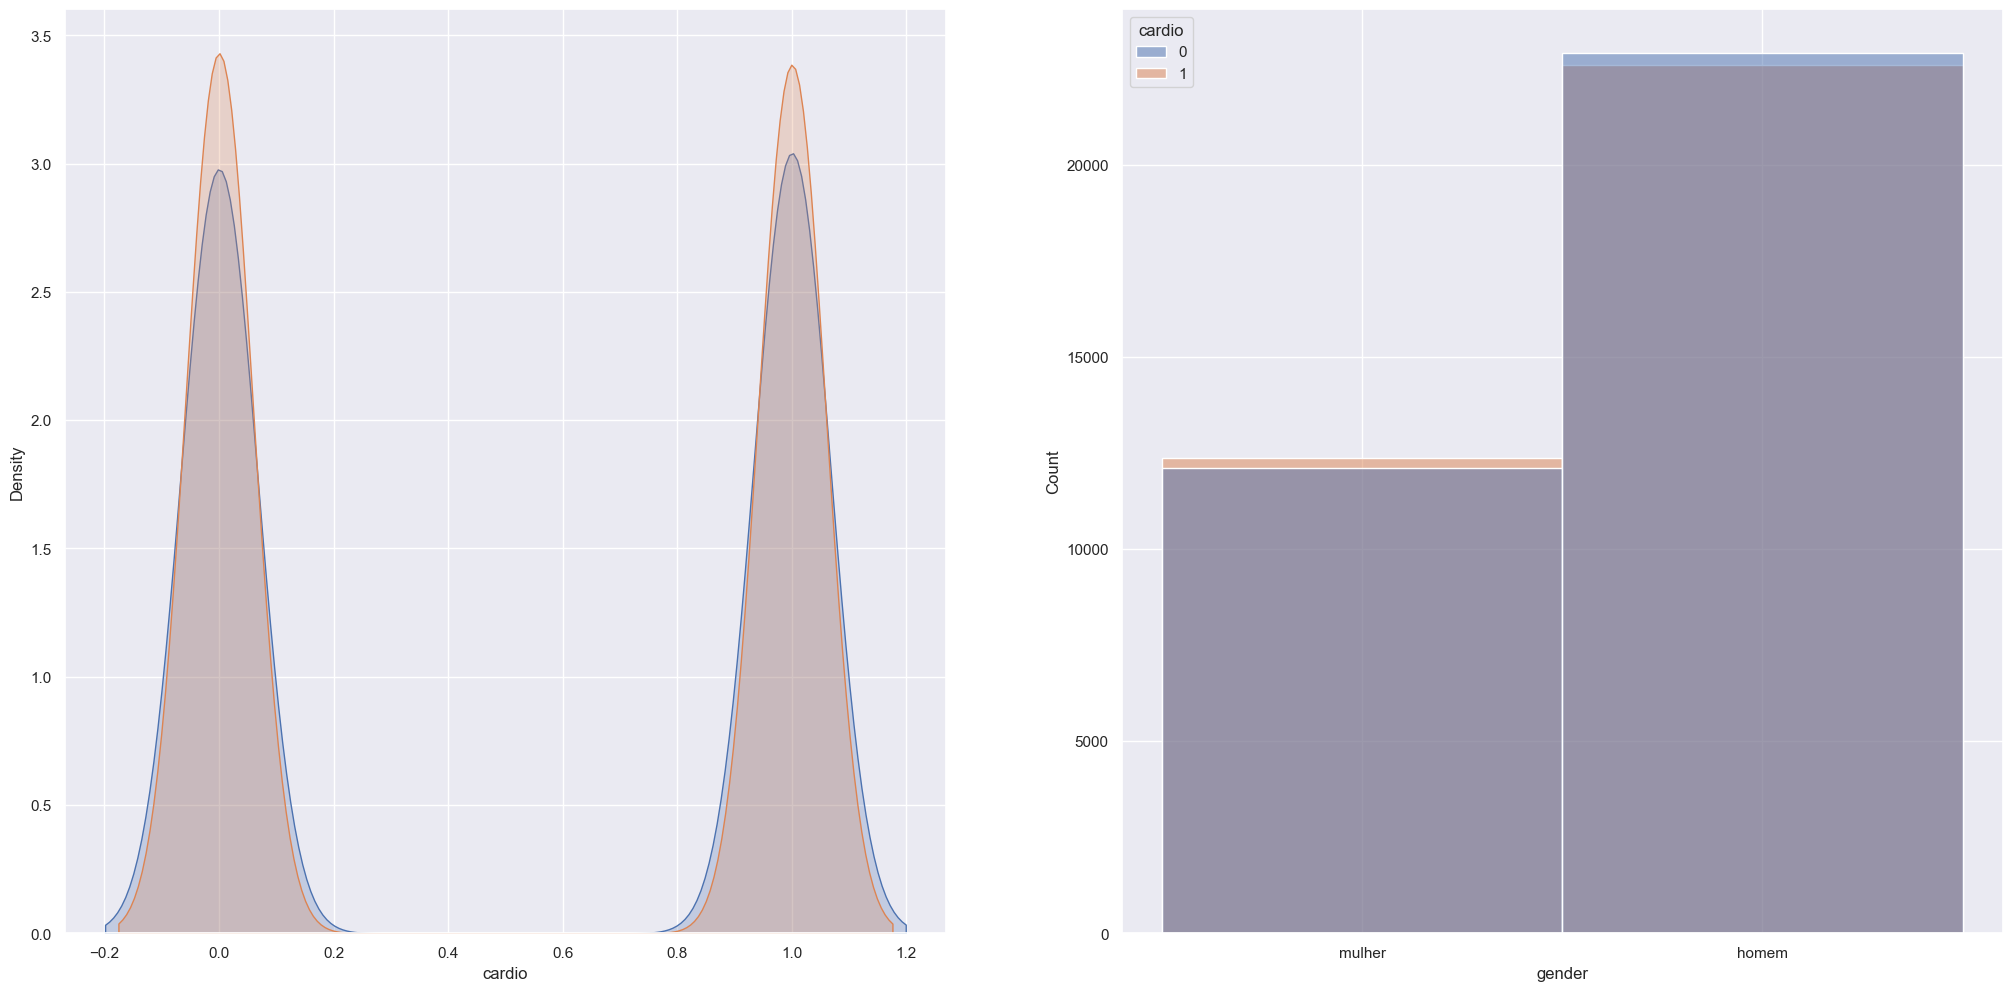

In [60]:
# gender: 1 women, 2 men

plt.subplot( 1, 2, 1 )
sns.kdeplot( df_cat[df_cat['gender'] == 'mulher']['cardio'], fill=True, legend=True  );
sns.kdeplot( df_cat[df_cat['gender'] == 'homem']['cardio'], fill=True, legend=True );


plt.subplot( 1, 2, 2 )
sns.histplot(x='gender', hue='cardio', data=df_cat, bins=75);


# False

##### <font color='red'> 2. Pessoas com IMC alto tem mais propensão à desenvolver problemas cardíacos - True / Relevant </font>



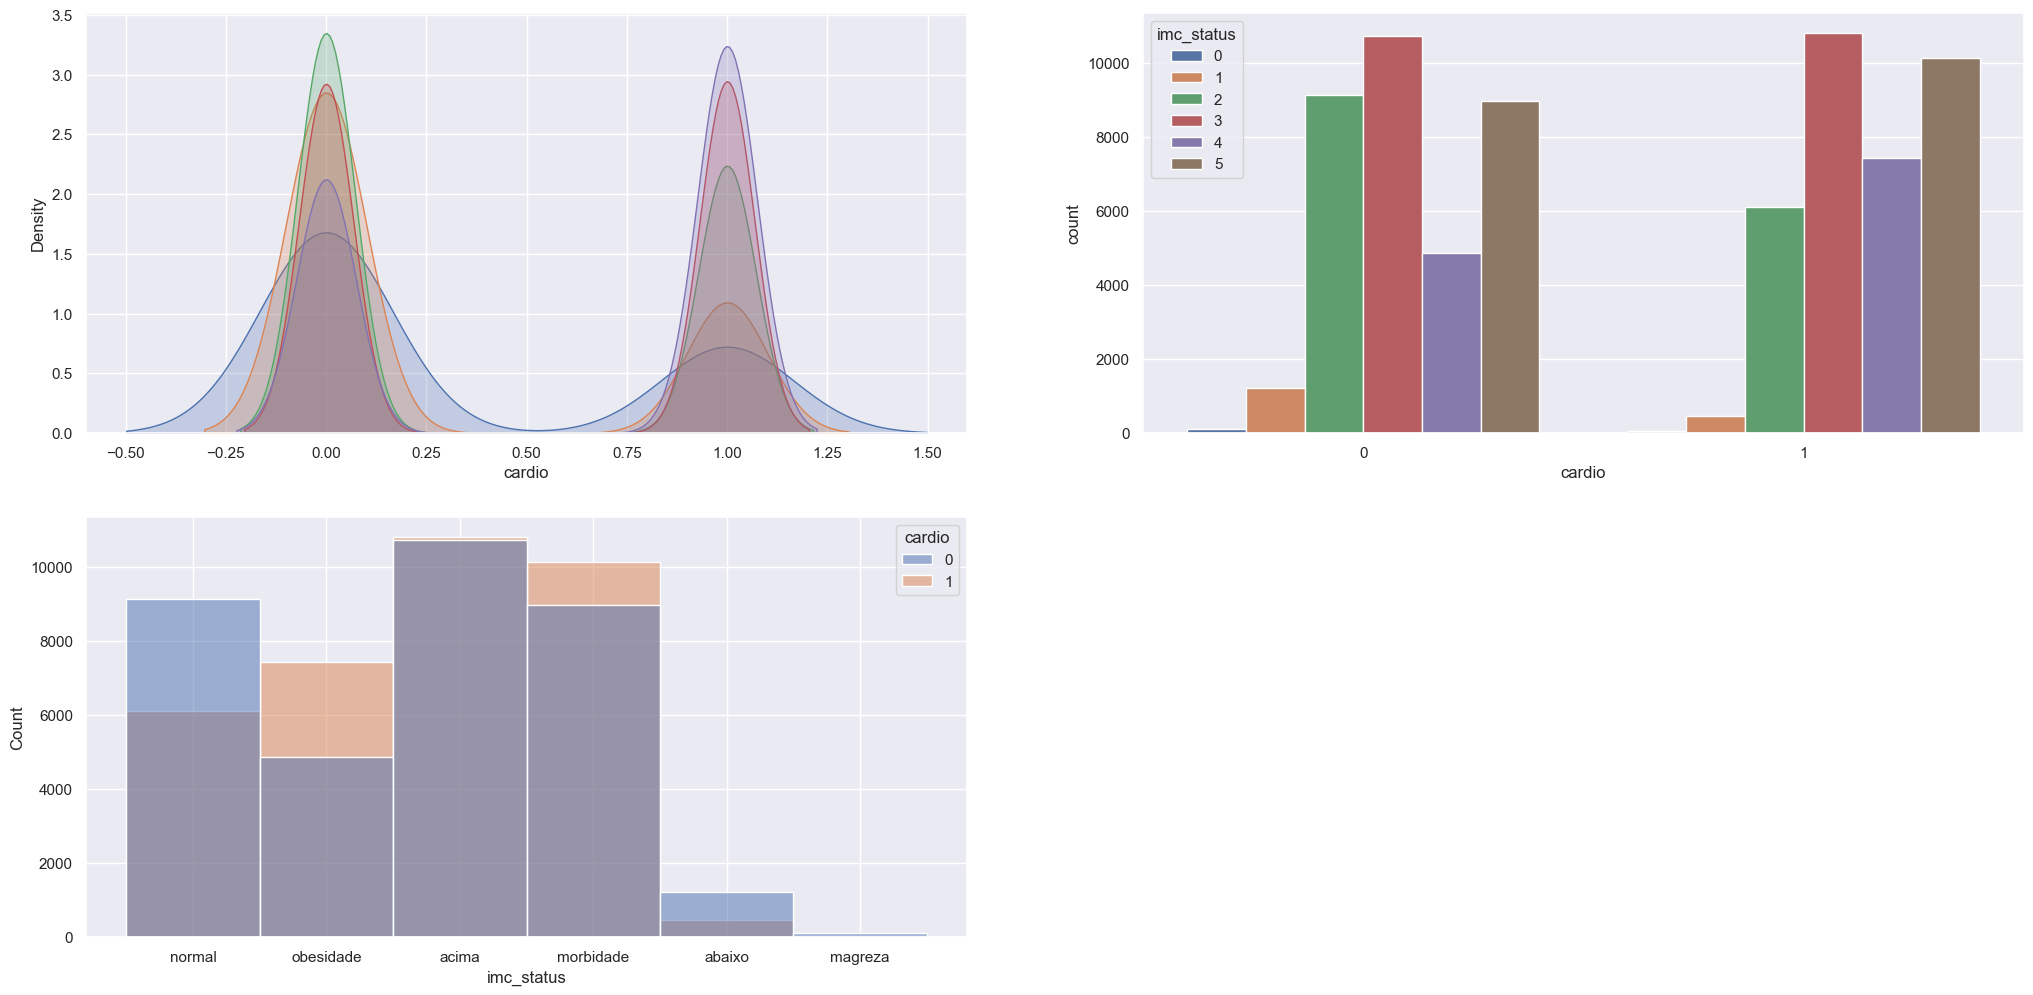

In [61]:
# magreza - < 16.9 - 0
# abaixo - 17 ~ 20 - 1
# normal - 20 ~ 24 - 2
# acima - 25 ~ 29 - 3
# obesidade - 30 ~ 35 - 4
# morbides - > 35 - 5


plt.subplot( 2, 2, 1 )
sns.kdeplot( df_cat[df_cat['imc_status'] == 'magreza']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'abaixo']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'normal']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'acima']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'obesidade']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['imc_status'] == 'morbides']['cardio'], fill=True, legend=True );

plt.subplot( 2, 2, 2 )


sns.countplot(
    x='cardio',
    hue=('imc_status'),
    data=df2,
);

plt.subplot( 2, 2, 3 )
sns.histplot(x='imc_status', hue='cardio', data=df_cat, bins=75);



# True


##### <font color='red'> 3. Pessoas idosos tem mais propensão à desenvolver problemas cardíacos - True/Relevant </font>

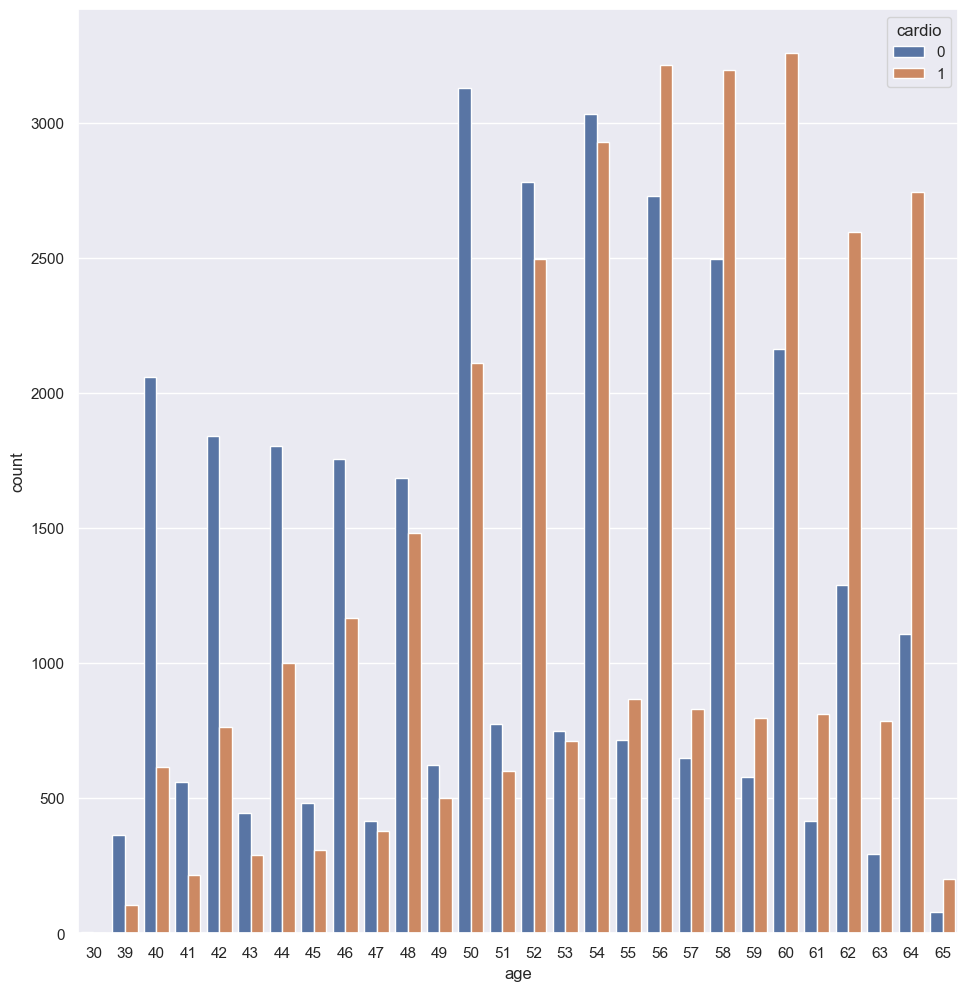

In [62]:
plt.subplot( 1, 2, 1 )
sns.countplot(x='age', hue='cardio', data=df_cat);

# True

##### 4. Pessoas que NÃO praticam atividades físicas tem mais propensão à desenvolver problemas cardíacos - False


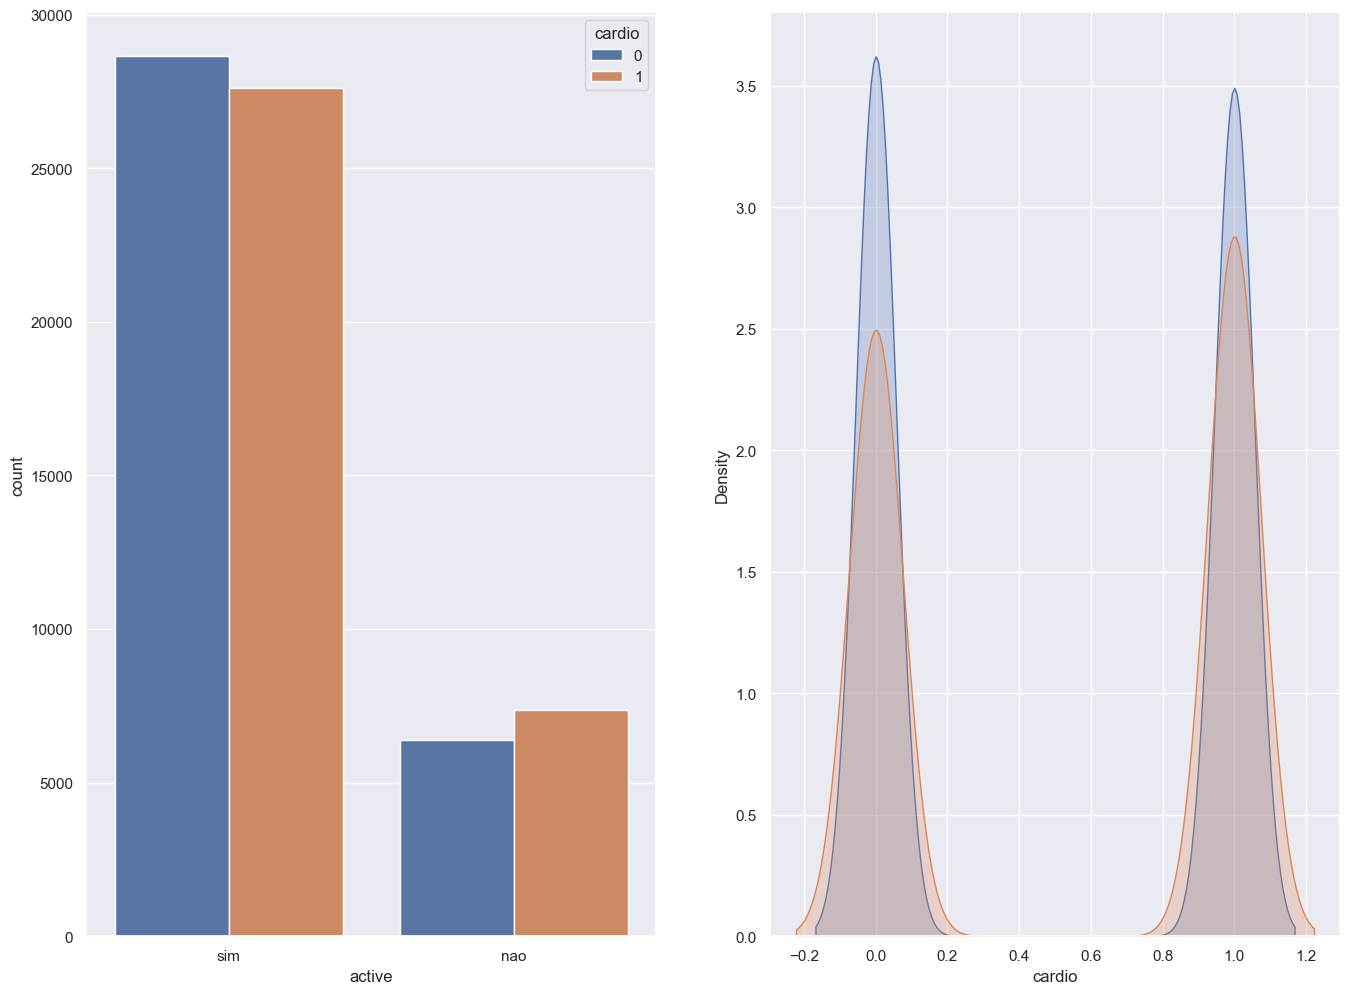

In [63]:
plt.subplot( 1, 3, 1 )
sns.countplot(x='active', hue='cardio', data=df_cat);

plt.subplot( 1, 3, 2 )
sns.kdeplot( df_cat[df_cat['active'] == 'sim']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['active'] == 'nao']['cardio'], fill=True, legend=True );


# False

##### <font color='red'> 5. Fumantes tem mais propensão à desenvolver problemas cardíacos - False </font>


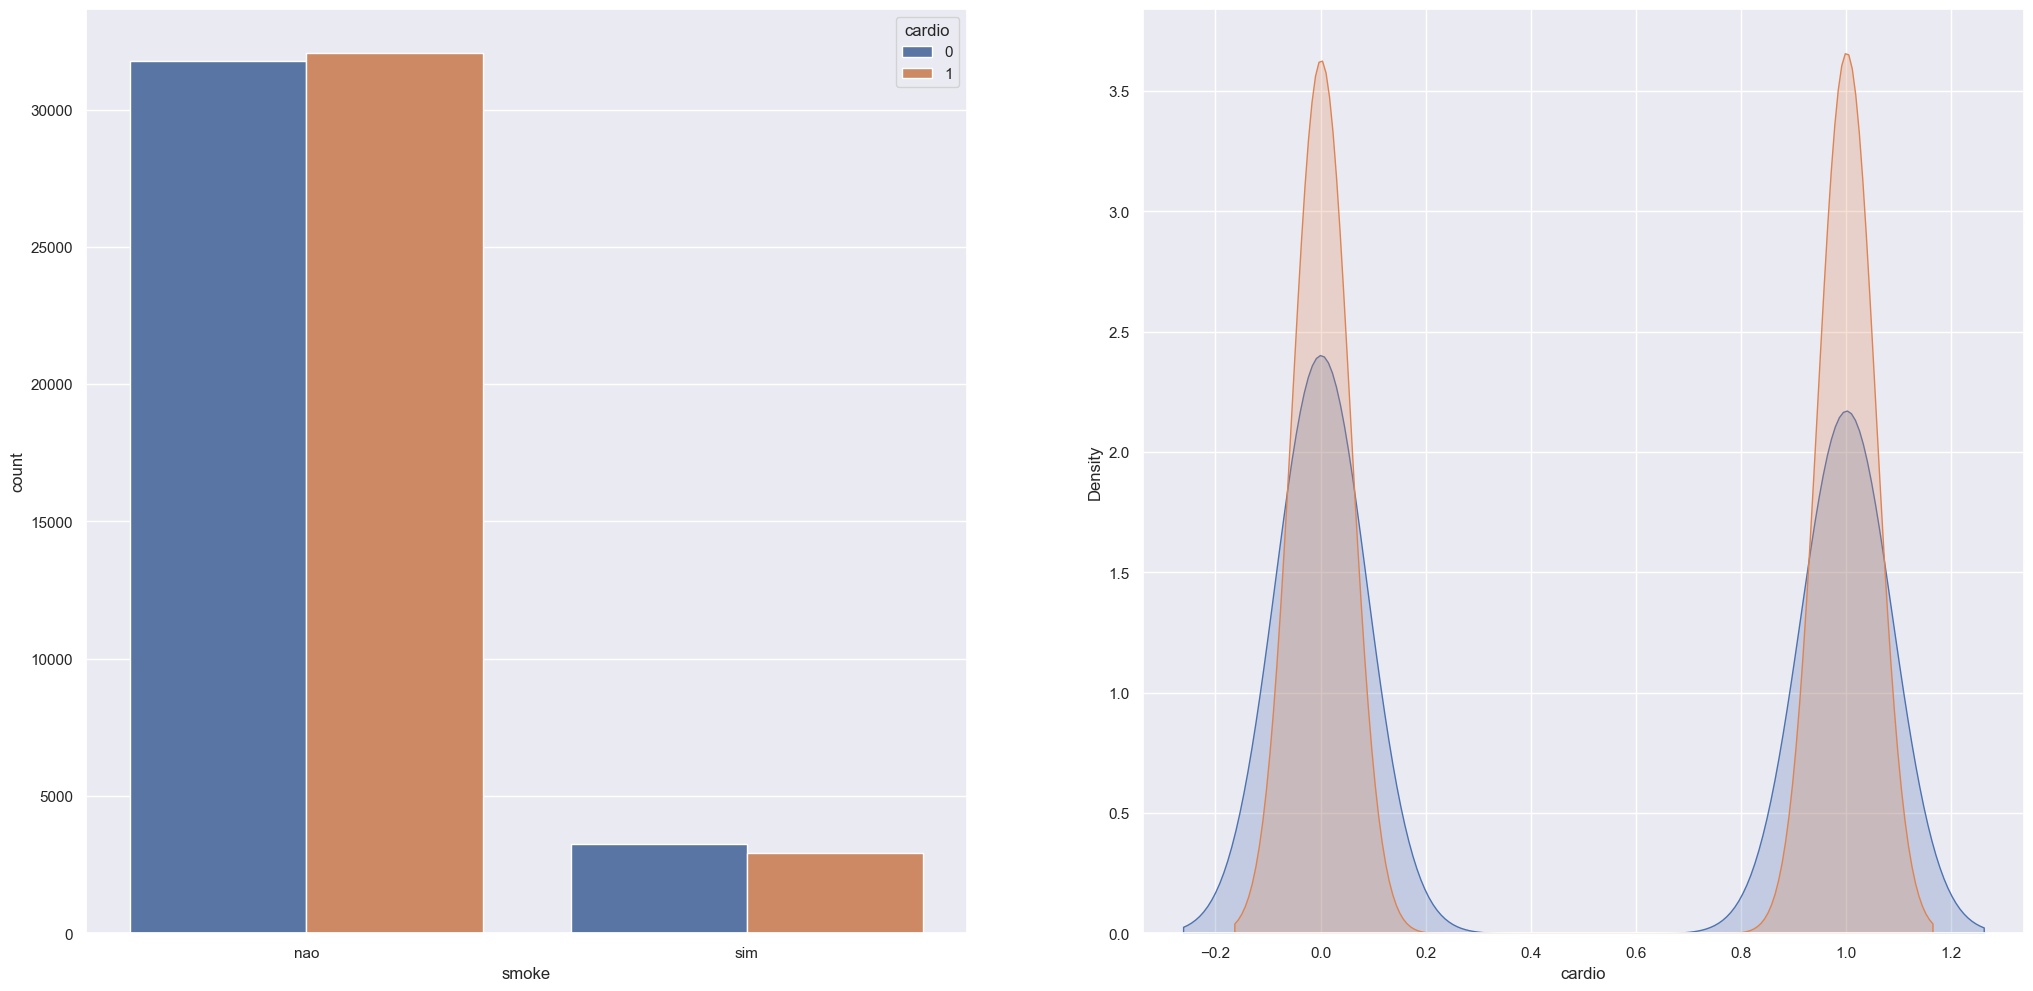

In [64]:
plt.subplot( 1, 2, 1 )
sns.countplot(x='smoke', hue='cardio', data=df_cat)

plt.subplot( 1, 2, 2 )
sns.kdeplot( df_cat[df_cat['smoke'] == 'sim']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['smoke'] == 'nao']['cardio'], fill=True, legend=True );


# False

#####  <font color='red'> 6. Pessoas que bebem tem mais propensão à desenvolver problemas cardíacos - False </font>

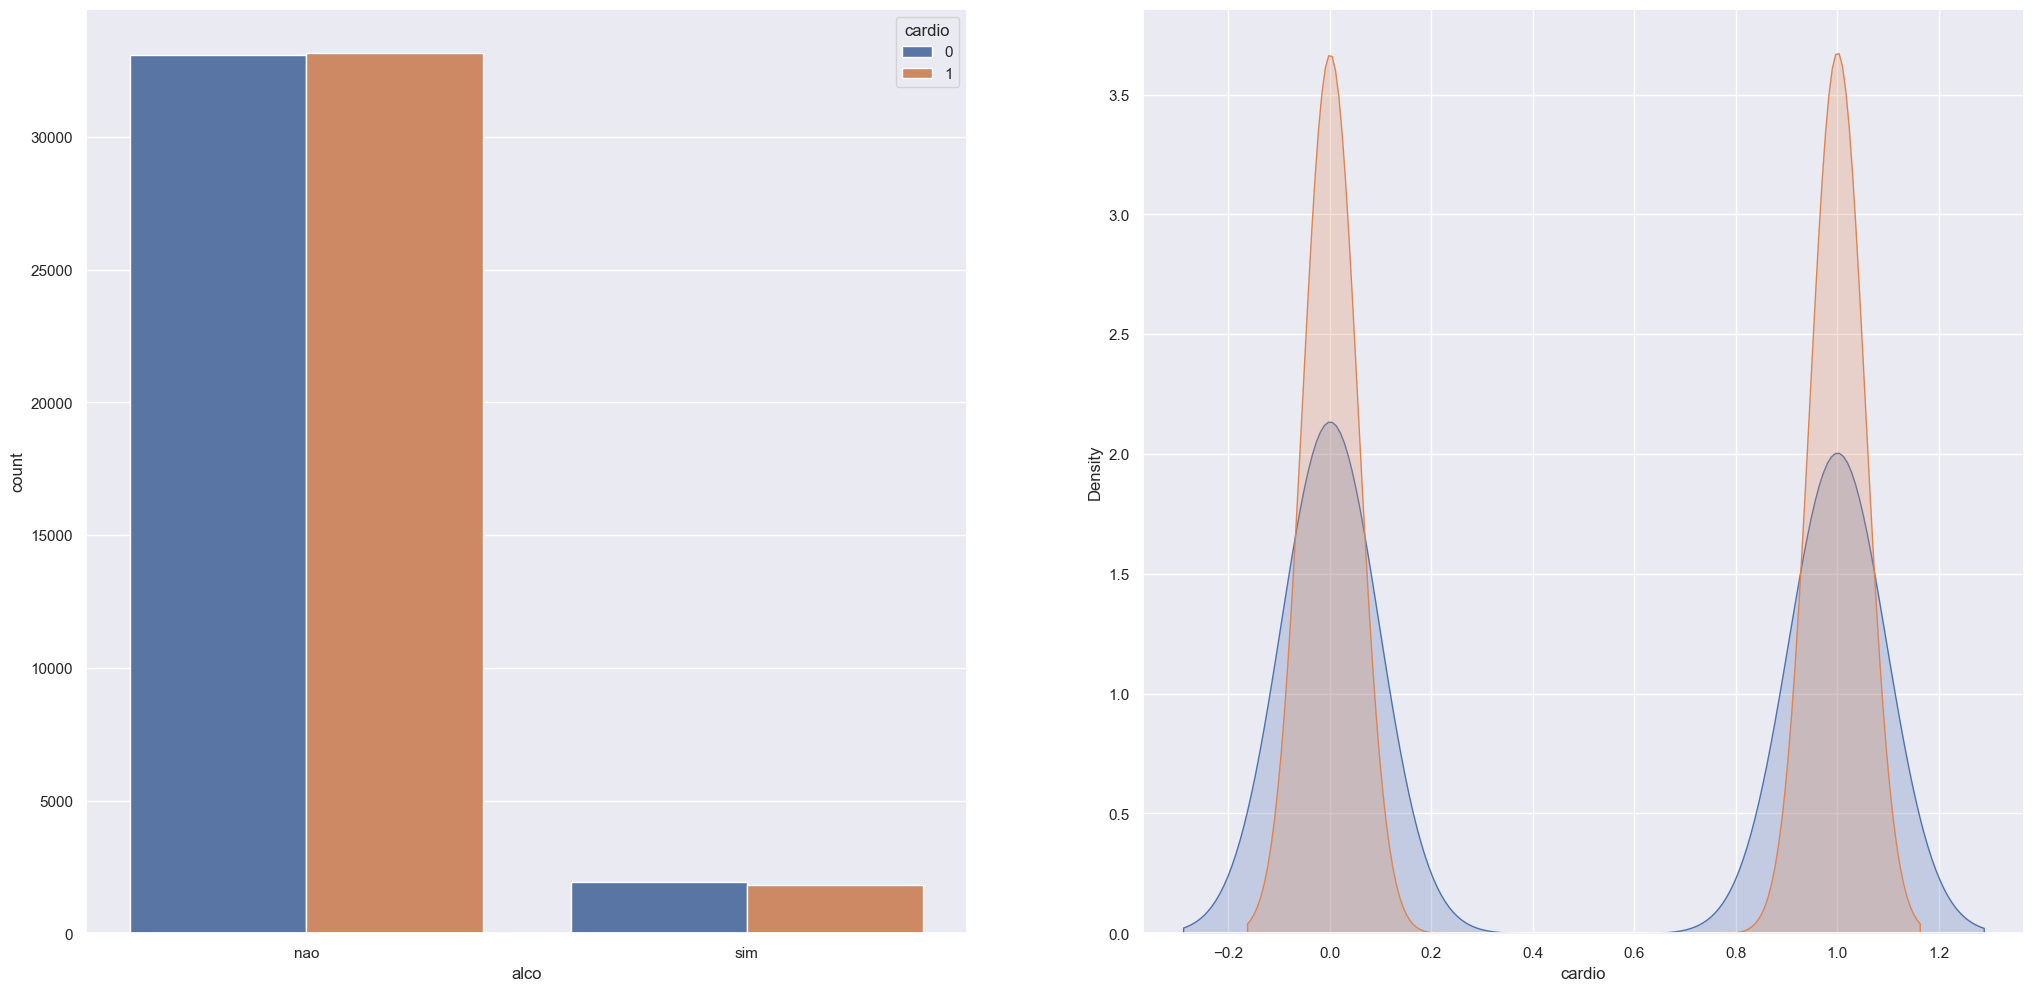

In [65]:
plt.subplot( 1, 2, 1 )
sns.countplot(x='alco', hue='cardio', data=df_cat)

plt.subplot( 1, 2, 2 )
sns.kdeplot( df_cat[df_cat['alco'] == 'sim']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['alco'] == 'nao']['cardio'], fill=True, legend=True );

# False

##### 7. Pessoas com alta glicemia tem mais propensão à desenvolver problemas cardíacos - True/ not relevante


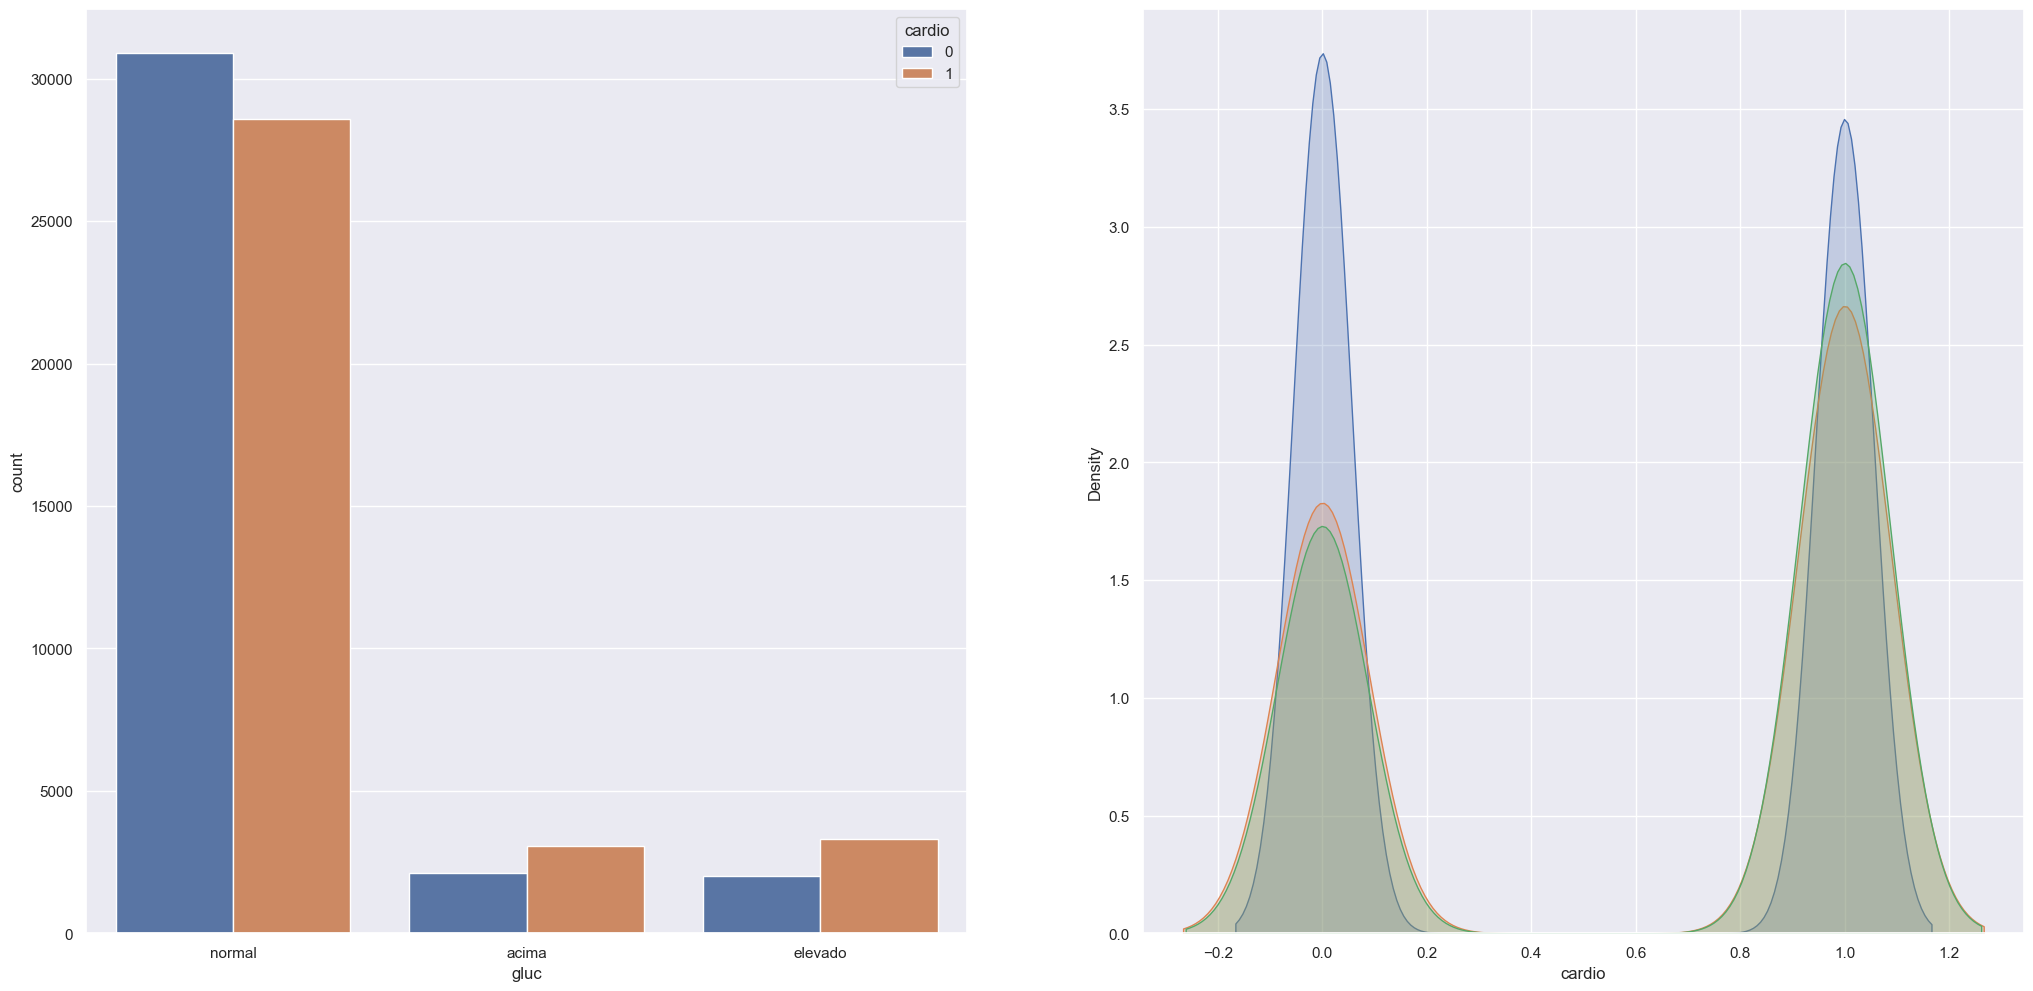

In [66]:
# soro_map = { 1: 'normal', 2: 'acima', 3: 'elevado'}

plt.subplot( 1, 2, 1 )
sns.countplot(x='gluc', hue='cardio', data=df_cat)

plt.subplot( 1, 2, 2 )
sns.kdeplot( df_cat[df_cat['gluc'] == 'normal']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['gluc'] == 'acima']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['gluc'] == 'elevado']['cardio'], fill=True, legend=True );


# True - But not too relevant

##### <font color='red'> 8. Pessoas com alto colesterol tem mais propensão à desenvolver problemas cardíacos - True/relevante </font>


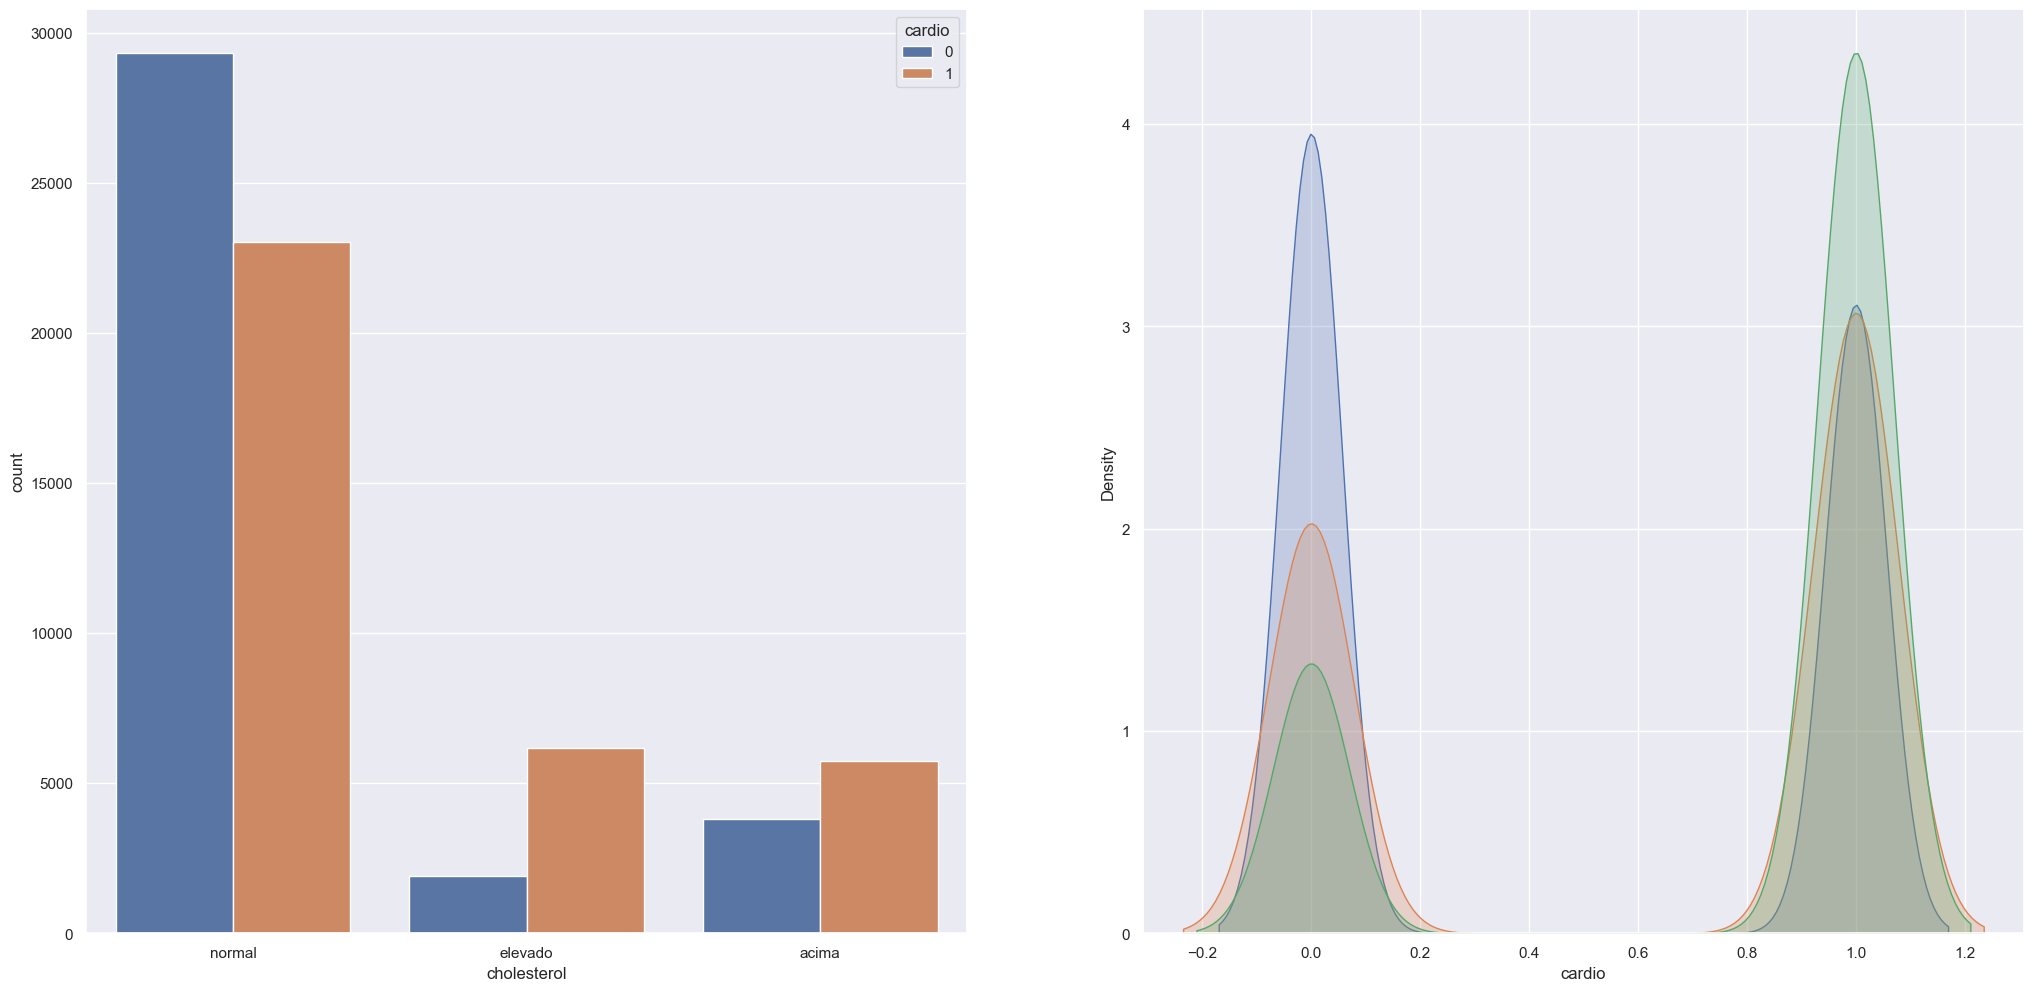

In [67]:
# soro_map = { 1: 'normal', 2: 'acima', 3: 'elevado'}

plt.subplot( 1, 2, 1 )
sns.countplot(x='cholesterol', hue='cardio', data=df_cat)

plt.subplot( 1, 2, 2 )
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'normal']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'acima']['cardio'], fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['cholesterol'] == 'elevado']['cardio'], fill=True, legend=True );


# True - Relevant

##### <font color='red'> 9. Quanto maior a Pressão Arterial mais propensão à desenvolver problemas cardíacos - True/Relevant </font>


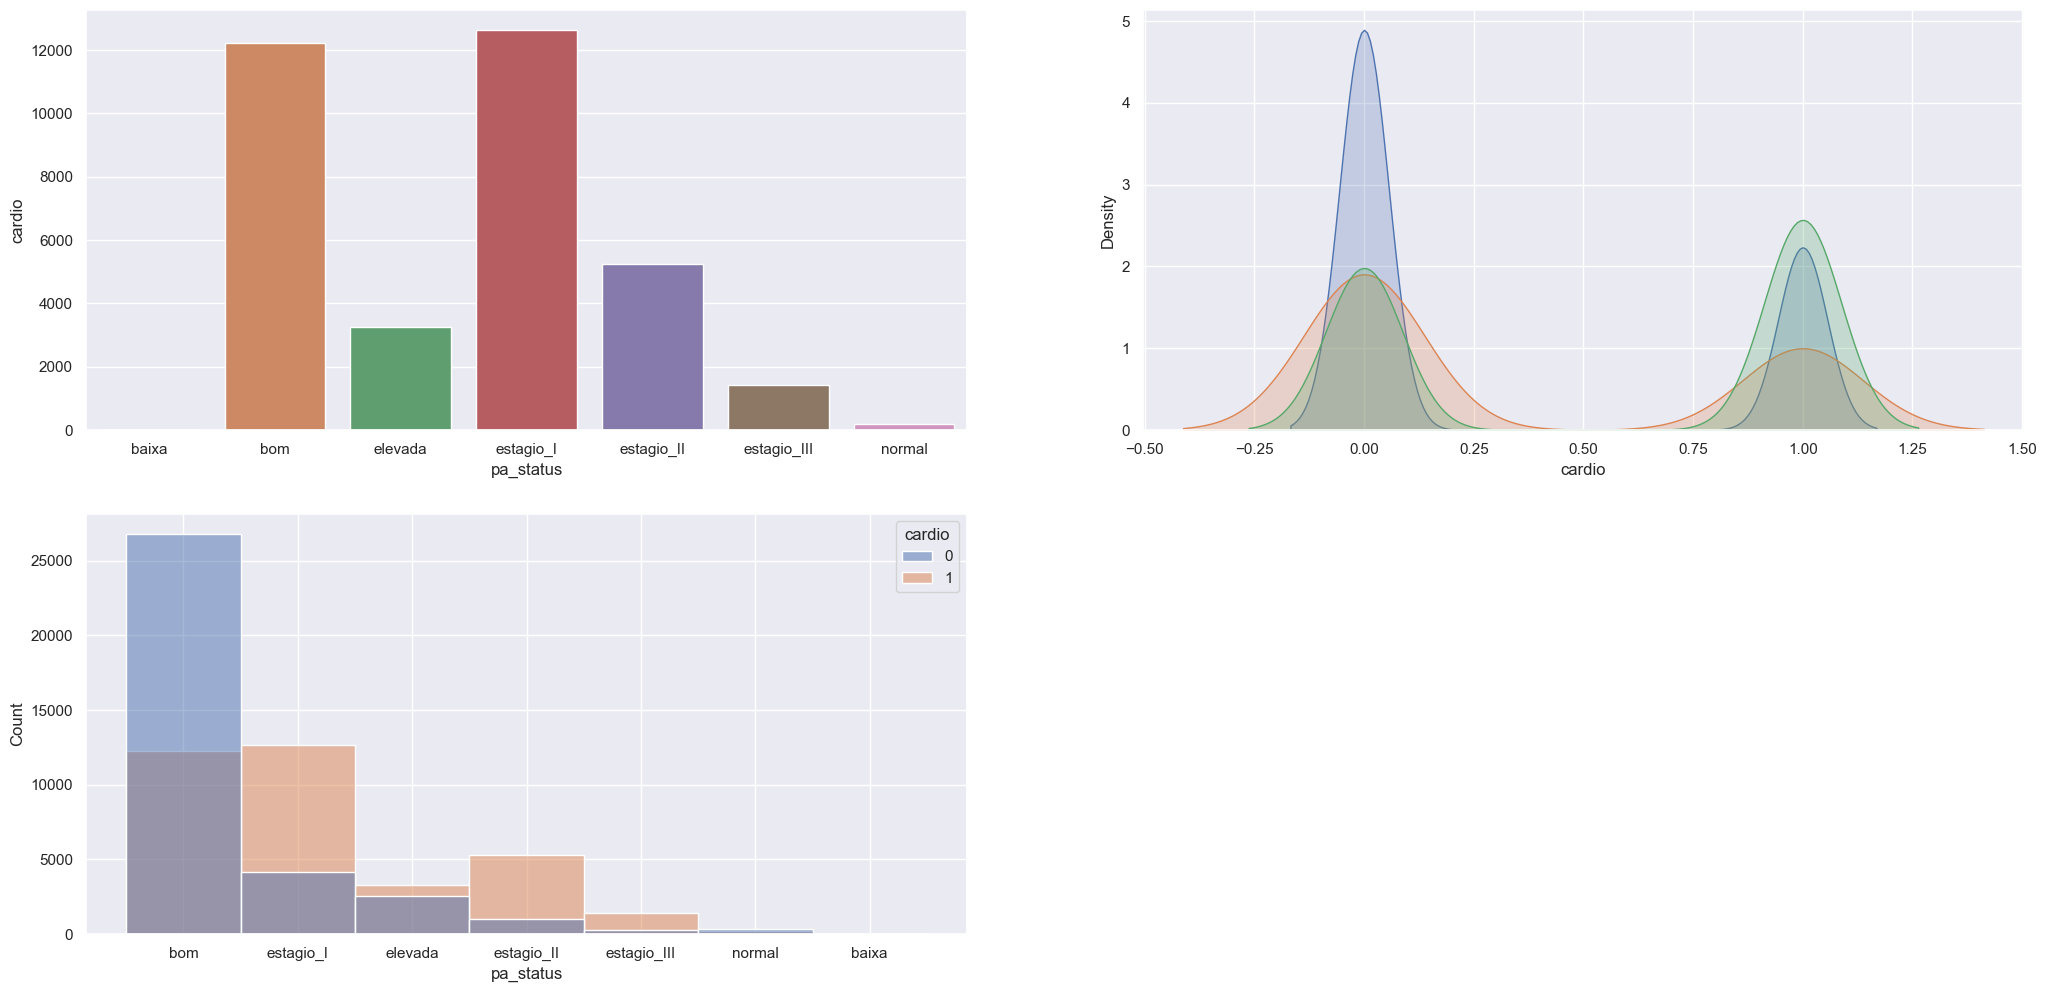

In [68]:
# Intervalos de PA segundo literatura: 

# baixa:       Hi <80  Lo <40 - 0
# Boa:         Hi <120 Lo <80 - 1
# normal:      Hi <129 Lo <84 - 2
# Elevada:     Hi <139 Lo <89 - 3
# estágio I:   Hi <159 Lo <99 - 4
# Estágio II:  Hi <179 Lo <109 - 5
# Estágio III: Hi >180 Lo >110 - 6

aux1 = df_cat[['pa_status', 'cardio']].groupby( 'pa_status' ).sum().reset_index()

plt.subplot( 2, 2, 1 )
sns.barplot( x ='pa_status', y='cardio', data=aux1 );

plt.subplot( 2, 2, 2 )
sns.kdeplot( df_cat[df_cat['pa_status'] == 'bom']['cardio'], label = 'bom', fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'normal']['cardio'], label = 'normal', fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'elevada']['cardio'],  label = 'elevada', fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estágio I']['cardio'],  label = 'estágio I', fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estágio II']['cardio'], label = 'estágio II', fill=True, legend=True );
sns.kdeplot( df_cat[df_cat['pa_status'] == 'estágio III']['cardio'], label = 'estágio III', fill=True, legend=True );


plt.subplot( 2, 2, 3 )
# sns.kdeplot( df_cat[df_cat['pa_status'] == 'baixa']['cardio'], fill=True, legend=True );

sns.histplot(x='pa_status', hue='cardio', data=df_cat, bins=75);

# True - relevante

##### 10. Altura não é relevante para o desenvolvimento de cardiopatias - False/less relevante

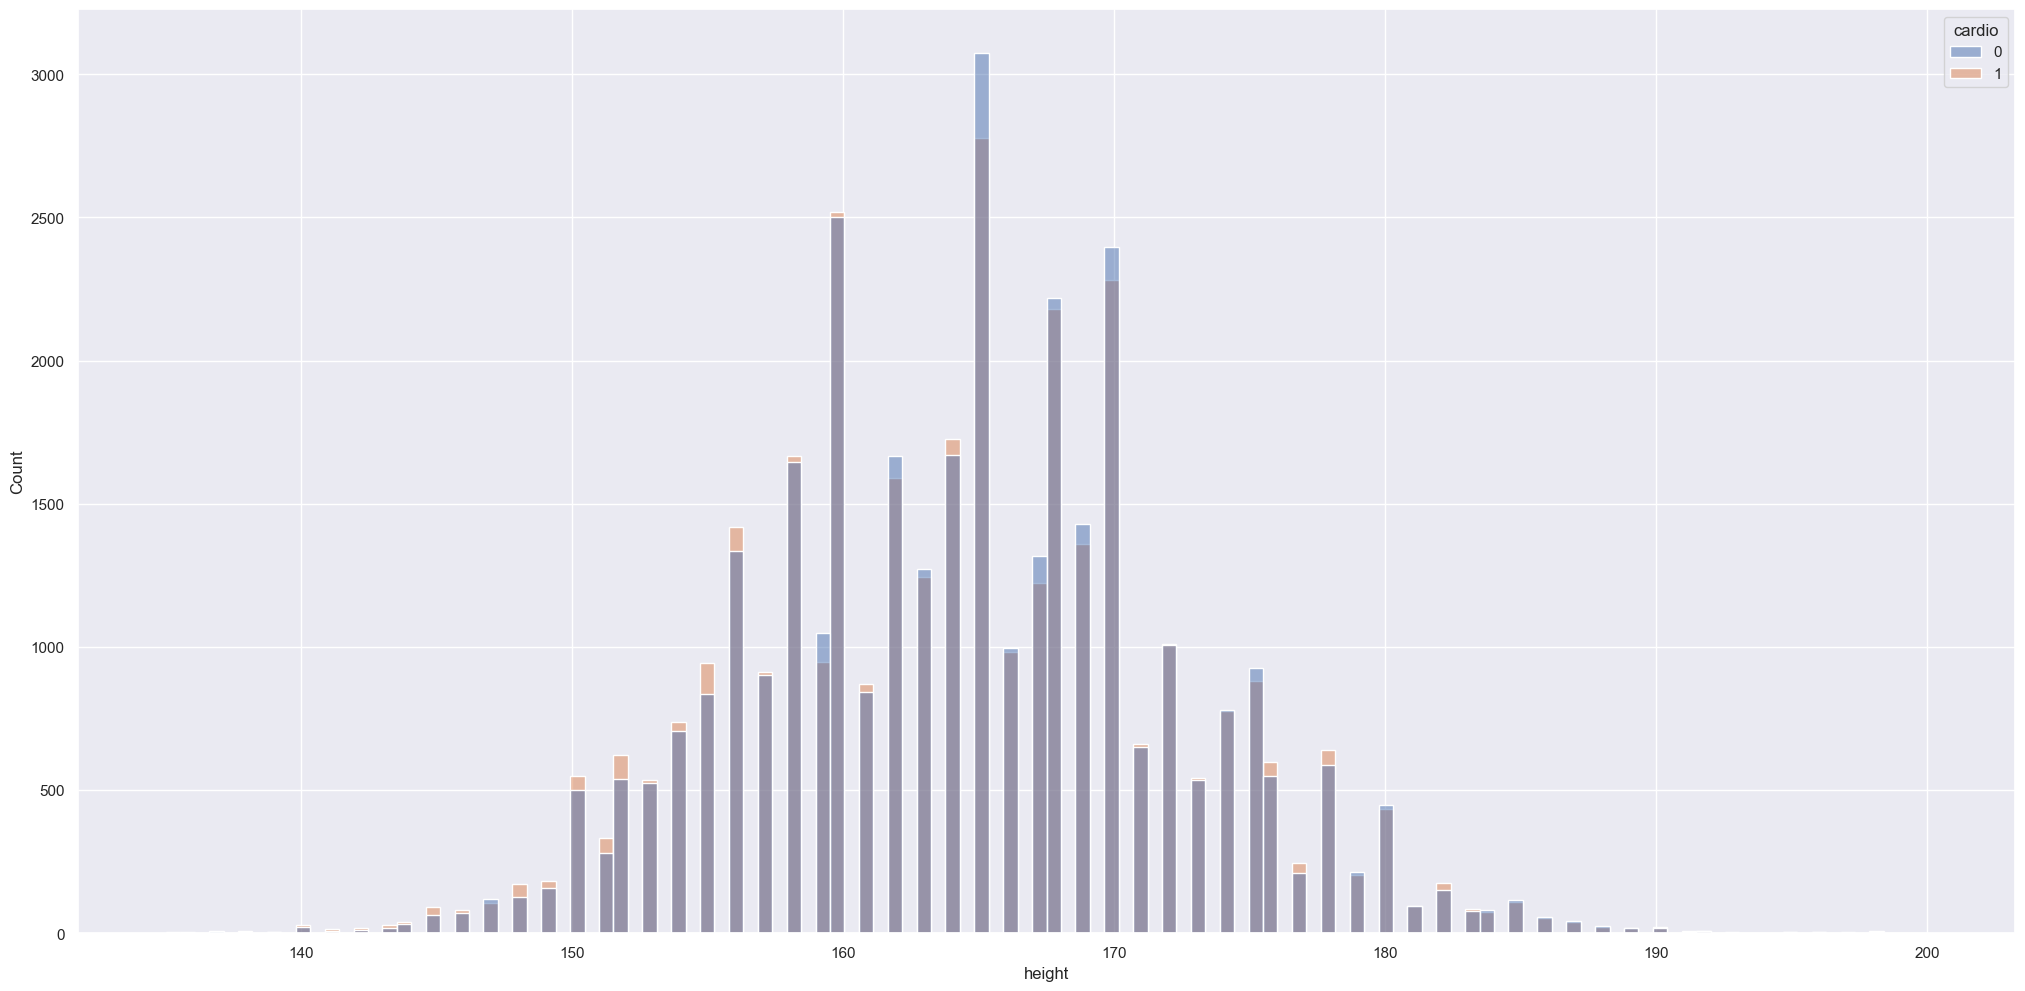

In [69]:
filtro = df_cat[(df_cat['height'] >= 135) & (df_cat['height'] <= 200)]
sns.histplot(x='height', hue='cardio', data=filtro);

# False - pouco relevante 

### Multivariate Analysis

Variáveis numéricas

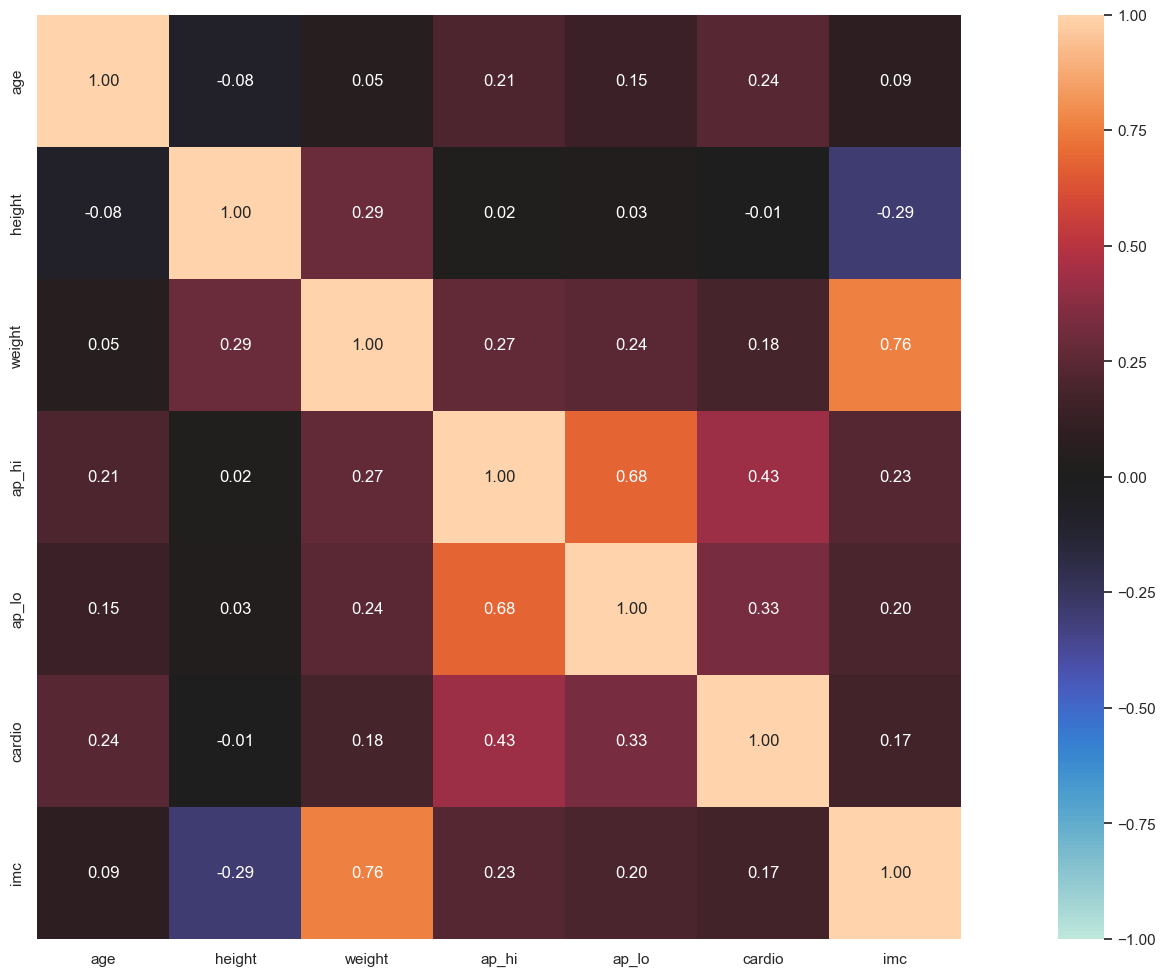

In [70]:
# Variáveis numéricas:

nominal.associations(num_attributes.drop('id',axis = 1));

Variáveis categóricas

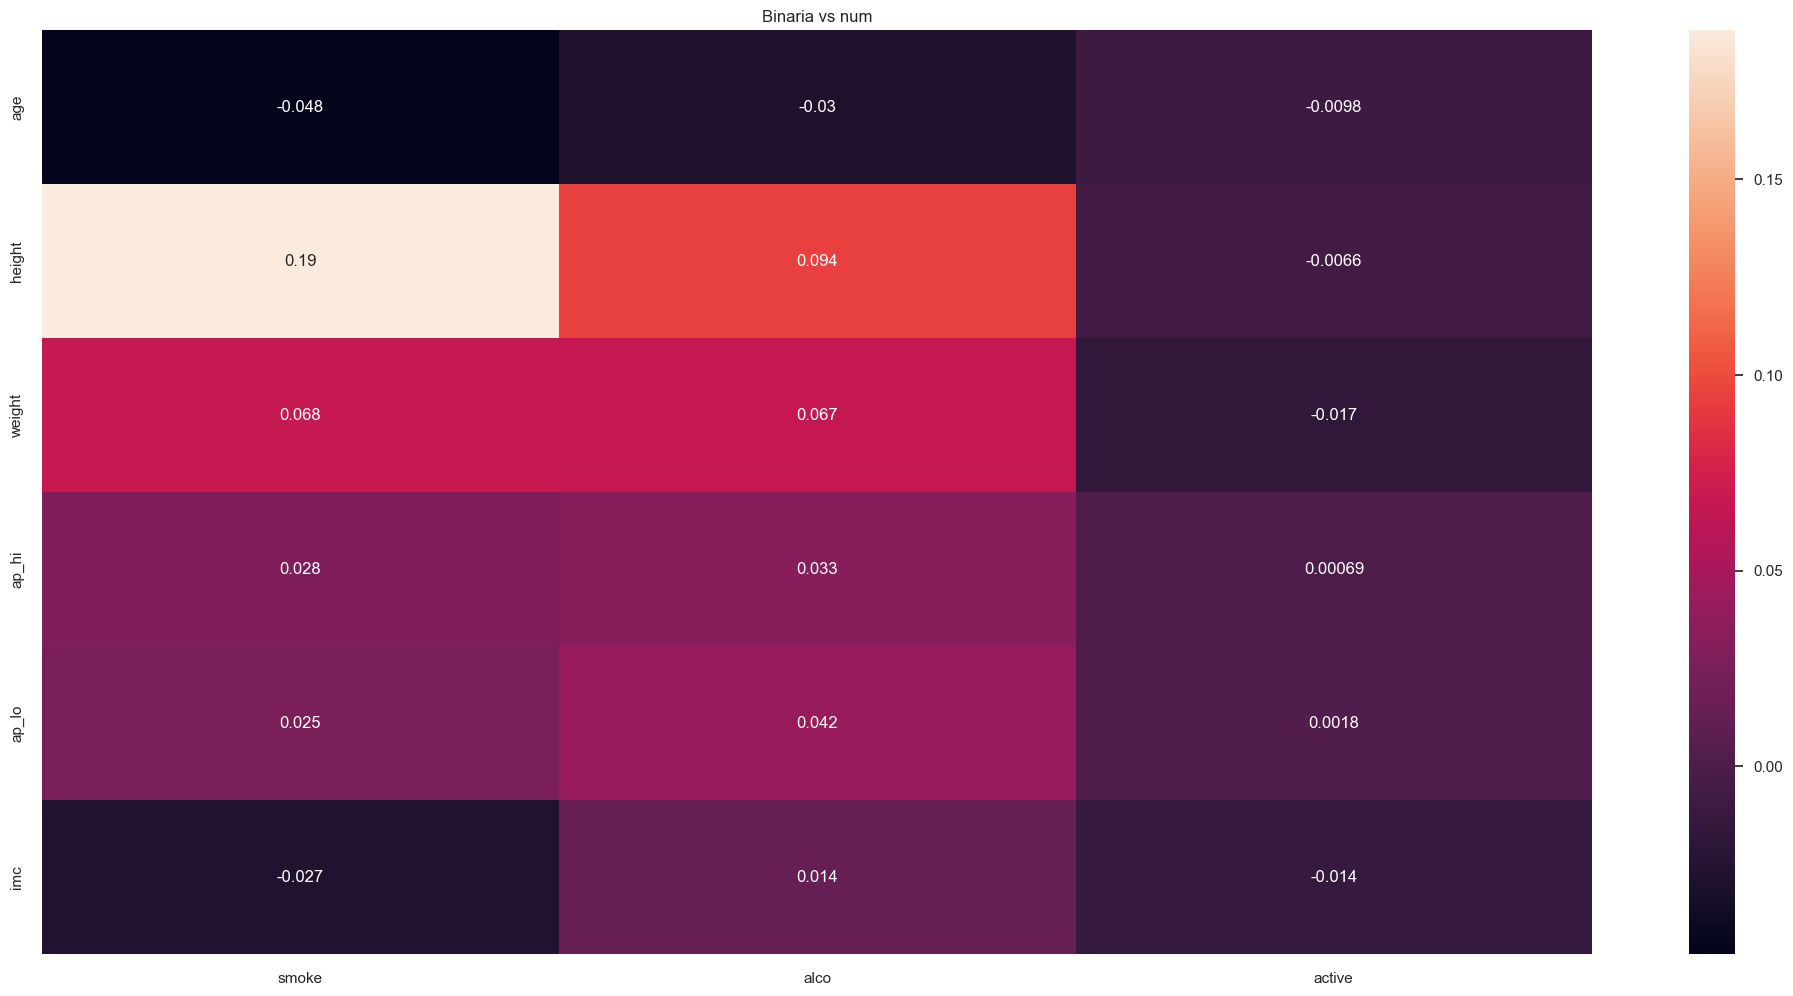

In [ ]:
# Comparação das variáveis binárias com as numéricas.

binarias = df3[['smoke', 'alco', 'active']]
numericas = df_cat[['age','height','weight','ap_hi','ap_lo', 'imc']]

a1 = pointbiserialr(binarias['smoke'], numericas['age'])[0]
a2 = pointbiserialr(binarias['smoke'], numericas['height'])[0]
a3 = pointbiserialr(binarias['smoke'], numericas['weight'])[0]
a4 = pointbiserialr(binarias['smoke'], numericas['ap_hi'])[0]
a5 = pointbiserialr(binarias['smoke'], numericas['ap_lo'])[0]
a6 = pointbiserialr(binarias['smoke'], numericas['imc'])[0]


a7 = pointbiserialr(binarias['alco'], numericas['age'])[0]
a8 = pointbiserialr(binarias['alco'], numericas['height'])[0]
a9 = pointbiserialr(binarias['alco'], numericas['weight'])[0]
a10 = pointbiserialr(binarias['alco'], numericas['ap_hi'])[0]
a11 = pointbiserialr(binarias['alco'], numericas['ap_lo'])[0]
a12 = pointbiserialr(binarias['alco'], numericas['imc'])[0]


a13 = pointbiserialr(binarias['active'], numericas['age'])[0]
a14 = pointbiserialr(binarias['active'], numericas['height'])[0]
a15 = pointbiserialr(binarias['active'], numericas['weight'])[0]
a16 = pointbiserialr(binarias['active'], numericas['ap_hi'])[0]
a17 = pointbiserialr(binarias['active'], numericas['ap_lo'])[0]
a18 = pointbiserialr(binarias['active'], numericas['imc'])[0]


# creates a DataFrame to store the values
df_pbs_r = pd.DataFrame({'smoke':[a1, a2, a3, a4, a5, a6],
                         'alco':[a7, a8, a9, a10, a11, a12, ],
                         'active':[a13, a14, a15, a16, a17, a18]})

# sets the index equal to columns
df_pbs_r = df_pbs_r.set_index(numericas.columns)

sns.heatmap(df_pbs_r, annot=True);
plt.title("Binaria vs num");

# displays plot
plt.show();

In [ ]:
MachineLearning(df_train)

Rodando modelo: XGBClassifier
Rodando modelo: SGDClassifier
Rodando modelo: LGBMClassifier
[LightGBM] [Info] Number of positive: 22103, number of negative: 21709
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504496 -> initscore=0.017986
[LightGBM] [Info] Start training from score 0.017986
[LightGBM] [Info] Number of positive: 22103, number of negative: 21709
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504496 -> initscore=0.017986
[LightGBM] [Info] Start training from score 0.017986
[LightGBM] [Info] Number of positive: 22102, number of negative: 21710
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 43812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504474 

,acurácia,recall,precision,eficiência,f1-score
XGBClassifier,0.726413,0.697191,0.744334,0.719974,0.726677
SGDClassifier,0.717210,0.716051,0.721785,0.718348,0.717222
LGBMClassifier,0.726486,0.700811,0.742564,0.721063,0.726718
GaussianNB,0.704355,0.649052,0.734164,0.688976,0.704855
Regressão Logística,0.718196,0.677211,0.741811,0.708014,0.718567
DecisionTreeClassifier,0.630238,0.609418,0.640325,0.624468,0.630426
KNN,0.669424,0.681012,0.669473,0.675168,0.669319
BaggingClassifier,0.662595,0.644708,0.672838,0.658455,0.662756
RandomForestClassifier,0.682936,0.697300,0.681548,0.689314,0.682806


#### <font color='red'> Model Evaluation </font>

[LightGBM] [Info] Number of positive: 27628, number of negative: 27137
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 54765, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504483 -> initscore=0.017932
[LightGBM] [Info] Start training from score 0.017932


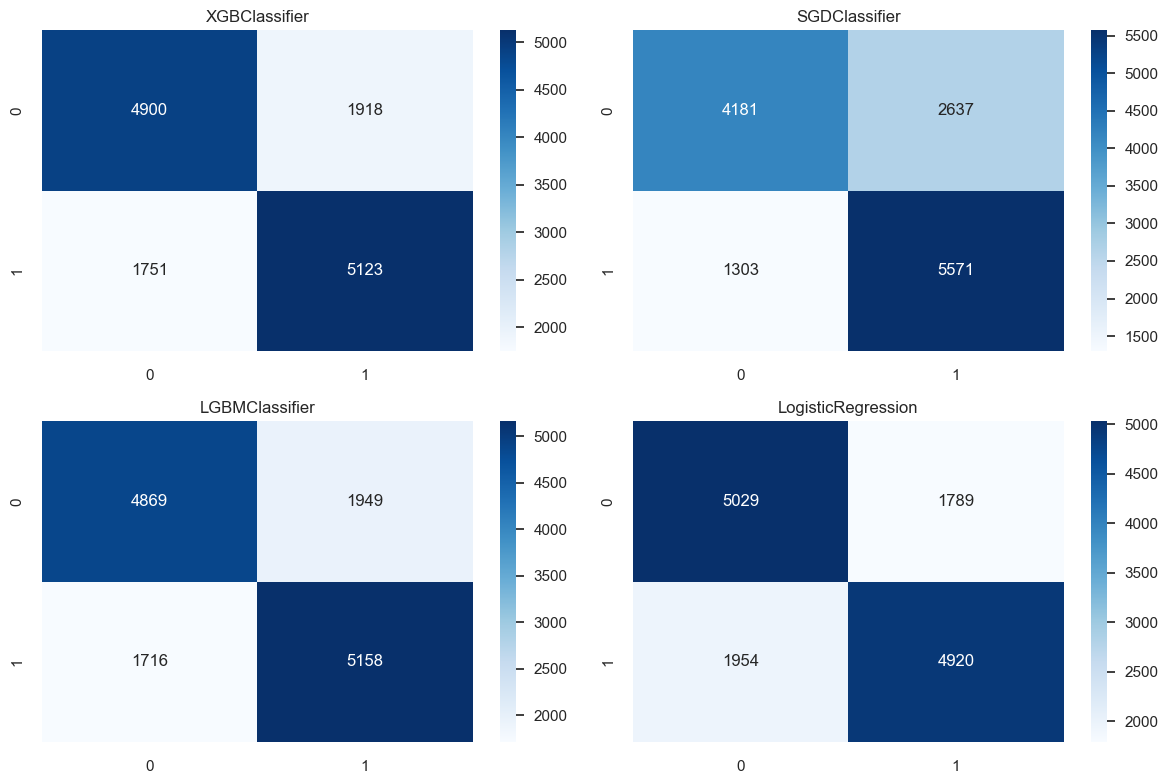

In [ ]:
threshold = 0.45
n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

lista_de_modelos = [XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3),
                    SGDClassifier(loss='log_loss', random_state=SEED, n_jobs=-1), 
                    LGBMClassifier(random_state=SEED, n_jobs=-1, force_row_wise=True),
                    LogisticRegression(max_iter=220, random_state=SEED)]


for clf, ax in zip(lista_de_modelos, axes.flatten()):
    # Fit the model
    clf.fit( x_train, y_train )
    
    # Predict the probabilities
    clf_probs = clf.predict_proba( x_teste )
    
    # Keep probabilities for the positive outcome only
    probs = clf_probs[:, 1]
    
    # Apply the threshold
    y_pred = np.where(probs > threshold, 1, 0)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_teste, y_pred)
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(type(clf).__name__)

# Adjust subplot layout
plt.tight_layout()

# Display the plot
plt.show()

[LightGBM] [Info] Number of positive: 27628, number of negative: 27137
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 54765, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504483 -> initscore=0.017932
[LightGBM] [Info] Start training from score 0.017932


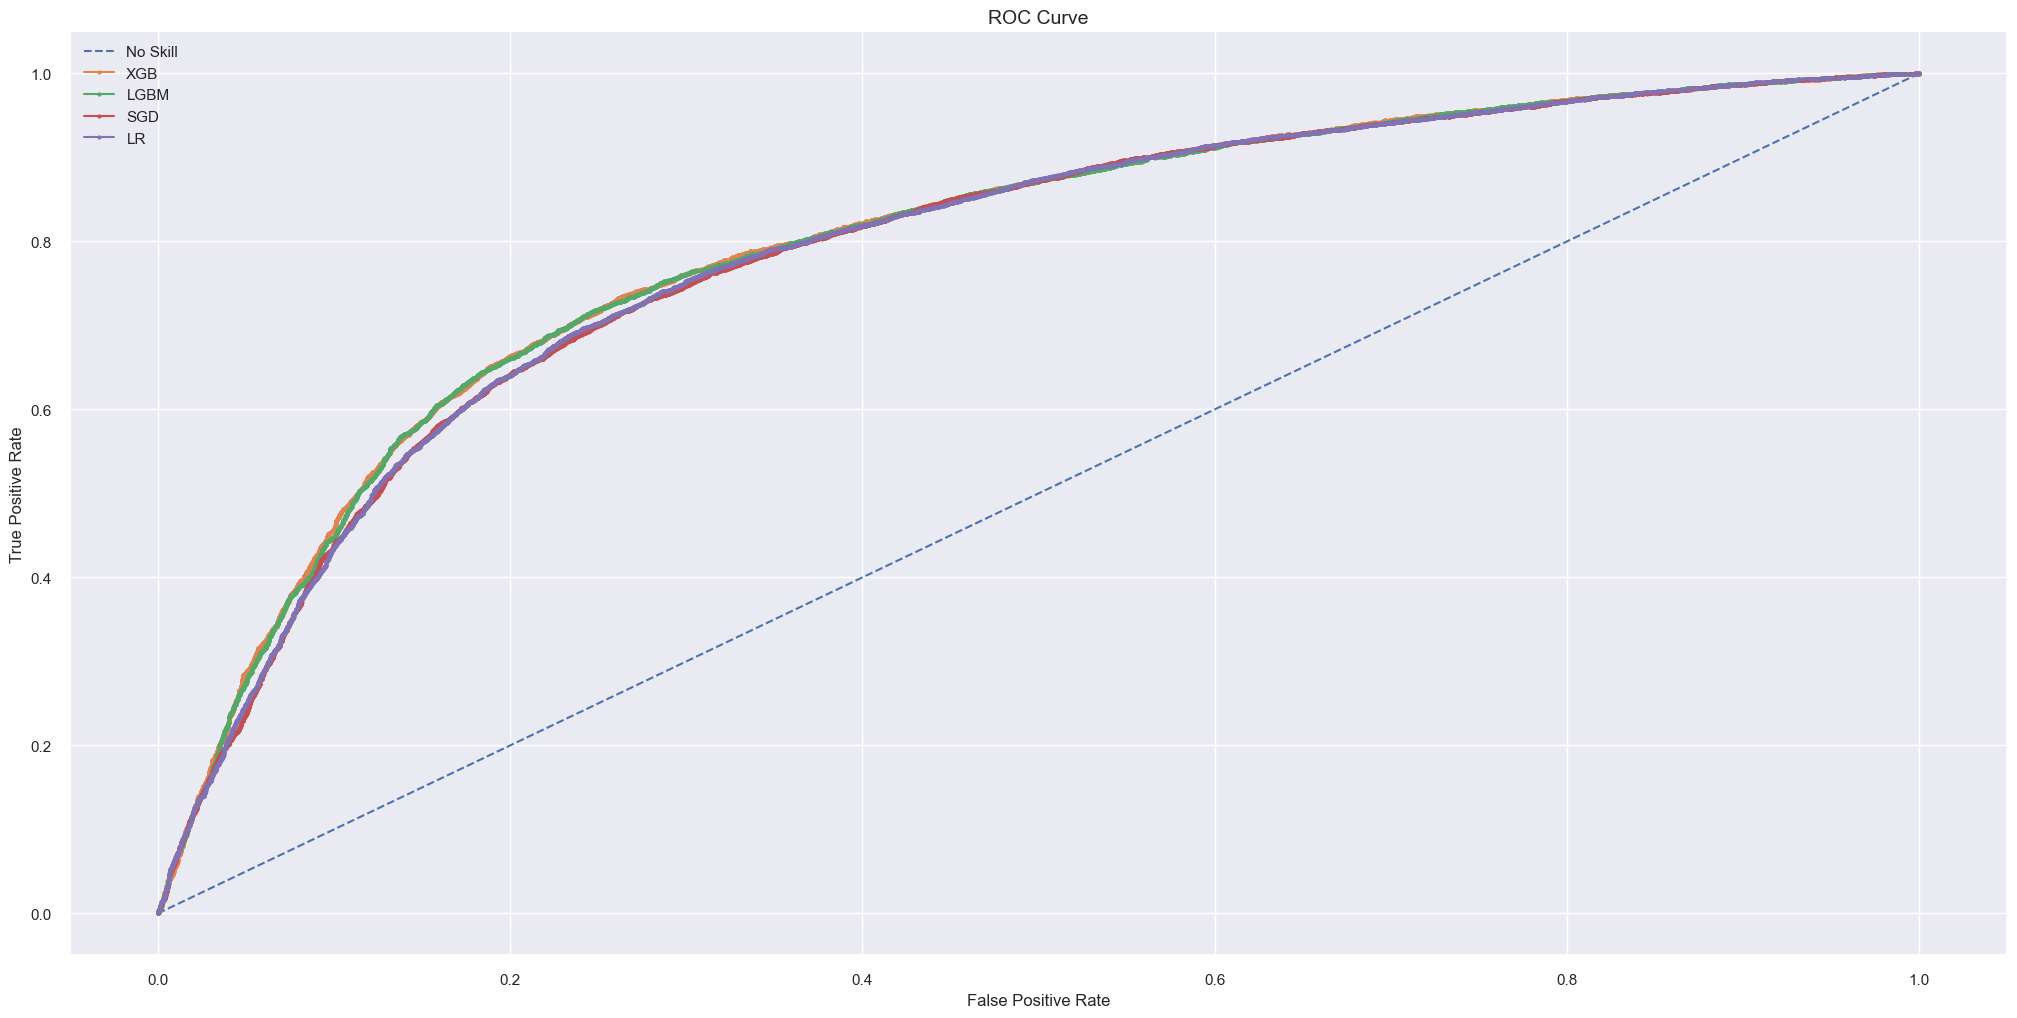

In [ ]:
# ROC Curve        

# trains the classifiers
xgb.fit( x_train, np.ravel( y_train ) )
lgbm.fit( x_train, np.ravel( y_train ) )
sgd.fit( x_train, np.ravel( y_train ) )
lr.fit( x_train, np.ravel( y_train ) )


# store the predicted probabilities for class 1
y_pred_xgb = xgb.predict_proba( x_teste )[ :,1 ]
y_pred_lgbm = lgbm.predict_proba( x_teste )[ :,1 ]
y_pred_sgd = sgd.predict_proba( x_teste )[ :,1 ]
y_pred_lr = lr.predict_proba( x_teste )[ :,1 ]

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# generate a no skill prediction (majority class)
ns_probs = [ 0 for _ in range( len( y_teste ) ) ]

# calculates the roc curves
ns_fpr, ns_tpr, _ = roc_curve( y_teste, ns_probs )
xgb_fpr, xgb_tpr, _ = roc_curve( y_teste, y_pred_xgb )
lgbm_fpr, lgbm_tpr, _ = roc_curve( y_teste, y_pred_lgbm )
sgd_fpr, sgd_tpr, _ = roc_curve( y_teste, y_pred_sgd )
lr_fpr, lr_tpr, _ = roc_curve( y_teste, y_pred_lr )

# plots the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LGBM')
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR')
#
# sets plot features
plt.title("ROC Curve", fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# displays the legend
plt.legend()

# displays the plot
plt.show()

### Final Result

In [ ]:
# # Modelo selecionado
# XGBoosting já aplica o boosting então não precisa dessa etapa.

# final_model = XGBClassifier( colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 6, n_estimators= 100, subsample= 0.8 )
final_model = XGBClassifier( colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.8 )


final_model.fit(x_train, y_train)
y_pred = final_model.predict( x_teste )

# Calculando as métricas de avaliação com base nas previsões da validação cruzada
accuracy = accuracy_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred)
balanced_accuracy = balanced_accuracy_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)

Accuracy: 0.7340052585451359
Recall: 0.7017748036077975
Precision: 0.7518703241895262
Balanced Accuracy: 0.7341376218097656
F1 Score: 0.7259593679458239


### Cros-Validation

In [ ]:
# Validação cruzada Leave One Out
kf = StratifiedKFold(n_splits = 10)

lista_de_medidas = ['precision', 'recall', 'f1']

modelo_final_cv = XGBClassifier( colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.8 )  

kf_scores = cross_validate(modelo_final_cv, x_final, y_final, cv=kf, scoring=lista_de_medidas, n_jobs=-1)

for medida in lista_de_medidas:
    print(f"Average {medida}: {kf_scores['test_' + medida].mean():.4f} (+/- {kf_scores['test_' + medida].std() * 2:.4f})")


Average precision: 0.7455 (+/- 0.0124)
Average recall: 0.6995 (+/- 0.0126)
Average f1: 0.7217 (+/- 0.0104)


#### Final Model Evaluation

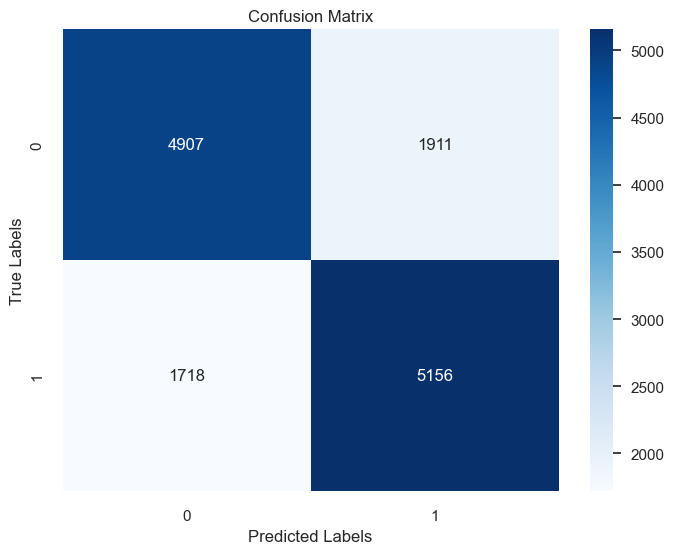

In [ ]:
threshold = 0.45

modelo_final_cv = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Fit the model
modelo_final_cv.fit(x_final, y_final)

# Predict the probabilities
modelo_final_cv_probs = modelo_final_cv.predict_proba(x_teste)

# Keep probabilities for the positive outcome only
probs = modelo_final_cv_probs[:, 1]

# Apply the threshold
y_pred = np.where(probs > threshold, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_teste, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Business Performance

A lembrar: "o cliente paga R$ 500,00 a cada 5 \% de acurácia acima de 50 \%. Por exemplo, para uma precisão de 55\%, o diagnóstico custa R$ 500,00 para o cliente, para uma precisão de 60 \%, o valor é de R$ 1000,00 e assimpor diante. 
Se a precisão do diagnóstico for 50\% o cliente não paga por ele."

In [ ]:
# Número de pacientes da base de dados: 70000

price_per_percent = 500/5
baseline = 50
num_pacients = 70000

# Medida escolhida: Precisão
model_accuracy = kf_scores['test_precision'].mean()
deviation = kf_scores['test_precision'].std() * 2

accuracy_lower = (model_accuracy - deviation) * 100
accuracy_upper = (model_accuracy + deviation) * 100

percent_difference_lower = accuracy_lower - baseline
percent_difference_upper = accuracy_upper - baseline

amount_best = percent_difference_upper * price_per_percent * num_pacients
amount_worst = percent_difference_lower * price_per_percent * num_pacients
average = ( amount_best + amount_worst ) /2

print(f'Best:  ${round(amount_best, 2):,.2f}')
print(f'Worst: ${round(amount_worst, 2):,.2f}')
print(f'Average: ${round(average, 2):,.2f}')


Best:  $180,490,556.97
Worst: $163,173,926.15
Average: $171,832,241.56
